In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
from collections import Counter
import itertools
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.6 MB/s eta 0:00:00


#Feature Selection on Main Data

In [ ]:
from AK_magic import FeatureSelector ##custom preprocessing script

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dashborad_academics/marks_sample.csv')

In [ ]:
df.head()

,Sr. No.,AM-I(70442101) ESE (70),AM-I(70442101) ISE (30),AM-I(70442101) ICA (25),AM-I(70442101) Condol/ Grace,AM-I(70442101) Total (125),AM-I(70442101)Grade,AM-I(70442101) GP,AM-I(70442101) EGP (Credits = 4),AM-I(70442101) Status,...,CGPA (Credits = 153),Status,Grade,Year of admission,Marks out of,Diploma/ Regular,Expected Year of Completion,Year of Completion,Number of extra years required,YD in First/ Second Year
0,1,32,28,23,0,83,A,8,32,P,...,7.92,Pass,A,2015,6400,Regular,2019,2019,0,None
1,2,29,25,19,0,73,B+,7,28,P,...,8.03,Pass,A,2015,5000,Diploma,2018,2018,0,None
2,3,64,30,24,0,118,O,10,40,P,...,9.02,Pass,A+,2015,6400,Regular,2019,2019,0,None
3,4,53,25,22,0,100,O,10,40,P,...,9.35,Pass,A+,2015,6400,Regular,2019,2019,0,None
4,5,31,25,24,0,80,A,8,32,P,...,9.31,Pass,A+,2015,6400,Regular,2019,2019,0,None


In [ ]:
df.shape

(200, 971)

In [ ]:
col = df.columns
for i in range(0,971):
  print(i,col[i])

0 Sr. No.
1 AM-I(70442101) ESE (70)
2 AM-I(70442101) ISE (30)
3 AM-I(70442101) ICA (25)
4 AM-I(70442101) Condol/ Grace
5 AM-I(70442101) Total (125)
6 AM-I(70442101)Grade
7 AM-I(70442101) GP
8 AM-I(70442101) EGP (Credits = 4)
9 AM-I(70442101) Status
10 AM-I(70442101)Attempts
11 AM-I(70442101) ESE (70) Final
12 AM-I(70442101) ISE (30) Final
13 AM-I(70442101) ICA (25) Final
14 AM-I(70442101) Condol/ Grace Final
15 AM-I(70442101) Total (125) Final
16 AM-I(70442101)Grade Final
17 AM-I(70442101) GP Final
18 AM-I(70442101) EGP (Credits = 4) Final
19 AM-I(70442101) Status Final
20 DMS(70442102) ESE (70)
21 DMS(70442102)ISE (30)
22 DMS(70442102)ICA (25)
23 DMS(70442102)Condol/ Grace
24 DMS(70442102) Total (125)
25 DMS(70442102)Grade
26 DMS(70442102) GP
27 DMS(70442102) EGP (Credits = 4)
28 DMS(70442102) Status
29 DMS(70442102) Attempts
30 DMS(70442102) ESE (70) Final
31 DMS(70442102)ISE (30) Final
32 DMS(70442102)ICA (25) Final
33 DMS(70442102)Condol/ Grace Final
34 DMS(70442102) Total (125) Fi

In [ ]:
sem3 = df.iloc[:,0:143]
sem4 = df.iloc[:,143:285]
sem5 = df.iloc[:,301:458]
sem6 = df.iloc[:,458:625]
sem7 = df.iloc[:,641:798]
sem8 = df.iloc[:,798:942]

In [ ]:
def default_preprocess(df):
  print(df.head())
  df_labels = df.iloc[:,-1:].values.tolist()
  df_labels = list(itertools.chain(*df_labels))
  df = df.iloc[:,:-1]
  count = 0
  sample = False
  counts = Counter(df_labels)
  print(counts)
  print("=====================================================================")
  for i in counts.values():
    if i == 1:
      sample = True
      break
    else:
      count+=1
  print(sample)
  if sample == True:
    element = list(counts)[count-len(counts)]
    print(element)
    index = df_labels.index(element)
    # Change the value at the index
    df_labels[index] = list(counts)[count-len(counts)-1]
    # Print the updated list
    # Get the frequency count of each element in the list
    counts = Counter(df_labels)

    # Print the counts
    print(counts)
    print("=====================================================================")
  le = LabelEncoder()

  df_labels = le.fit_transform(df_labels)

  fs = FeatureSelector(data = df, labels = df_labels)
  fs.identify_missing(missing_threshold=0.6)
  print("=====================================================================")
  fs.identify_single_unique()
  single_unique = fs.ops['single_unique']
  print(single_unique)
  fs.plot_unique()
  print("=====================================================================")
  fs.unique_stats.sample(5)
  print("=====================================================================")

  fs.identify_collinear(correlation_threshold=0.975)
  correlated_features = fs.ops['collinear']
  print(correlated_features[:5])
  print("=====================================================================")
  fs.plot_collinear()
  print("=====================================================================")
  fs.plot_collinear(plot_all=True)
  print("=====================================================================")
  fs.identify_collinear(correlation_threshold=0.98)
  fs.plot_collinear()
  print("=====================================================================")
  fs.identify_zero_importance(task = 'classification', eval_metric = 'multi_logloss', 
                            n_iterations = 10, early_stopping = True)
  print("=====================================================================")
  one_hot_features = fs.one_hot_features
  base_features = fs.base_features
  print('There are %d original features' % len(base_features))
  print('There are %d one-hot features' % len(one_hot_features))

  fs.data_all.head(10)
  print("=====================================================================")
  zero_importance_features = fs.ops['zero_importance']
  print(zero_importance_features[10:15])
  print("=====================================================================")
  fs.plot_feature_importances(threshold = 0.99, plot_n = 12)
  print("=====================================================================")
  one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
  print(len(one_hundred_features))
  print("=====================================================================")
  for rank in range(1,len(one_hundred_features)):
    print("rank: ",rank," : ", one_hundred_features[rank-1])

  fs.identify_low_importance(cumulative_importance = 0.99)
  print("=====================================================================")
  low_importance_features = fs.ops['low_importance']
  print(low_importance_features[:5])

  print(fs.feature_importances.head(10))
  print("=====================================================================")
  train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

  print('Original Number of Features', df.shape[1])
  print('Final Number of Features: ', train_removed_all.shape[1])



#sem 3

   Sr. No. AM-I(70442101) ESE (70)  AM-I(70442101) ISE (30)  \
0        1                      32                       28   
1        2                      29                       25   
2        3                      64                       30   
3        4                      53                       25   
4        5                      31                       25   

   AM-I(70442101) ICA (25)  AM-I(70442101) Condol/ Grace  \
0                       23                             0   
1                       19                             0   
2                       24                             0   
3                       22                             0   
4                       24                             0   

   AM-I(70442101) Total (125) AM-I(70442101)Grade  AM-I(70442101) GP  \
0                          83                  A                   8   
1                          73                 B+                   7   
2                         118               

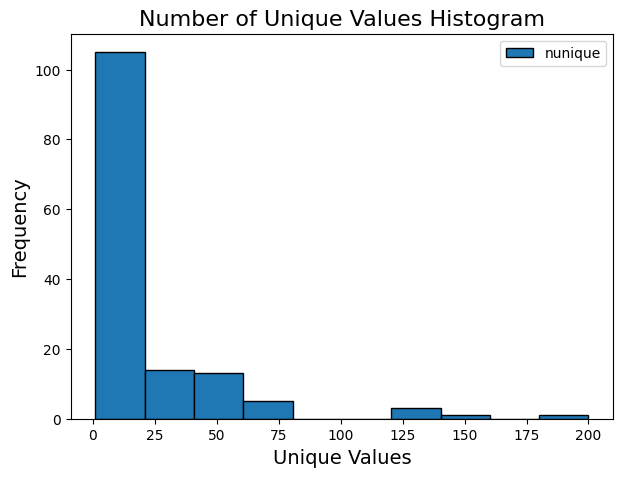

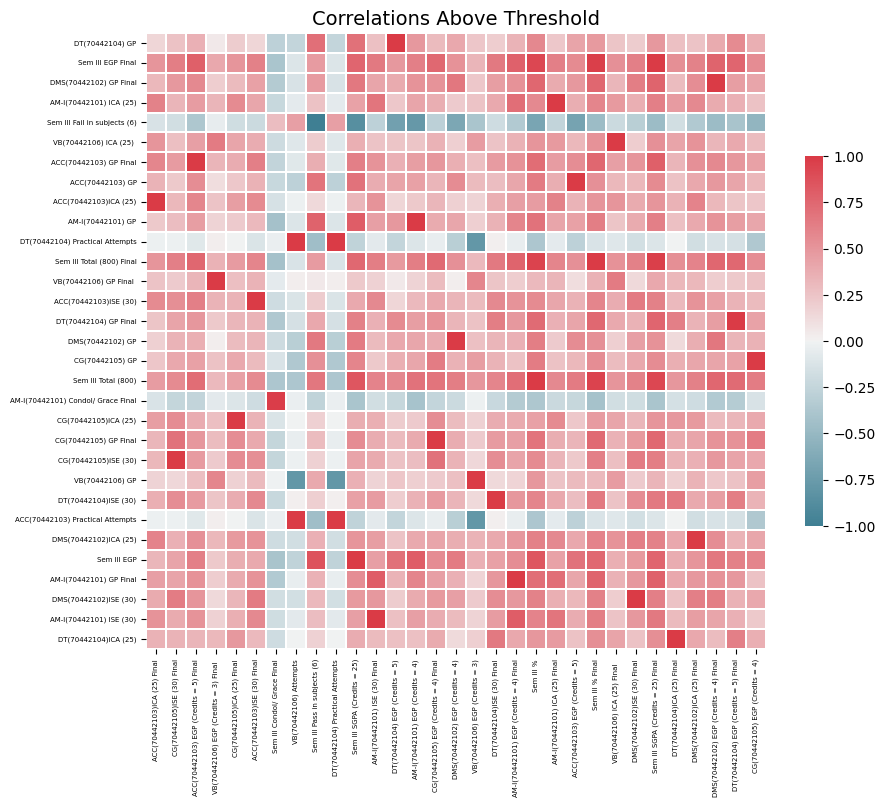

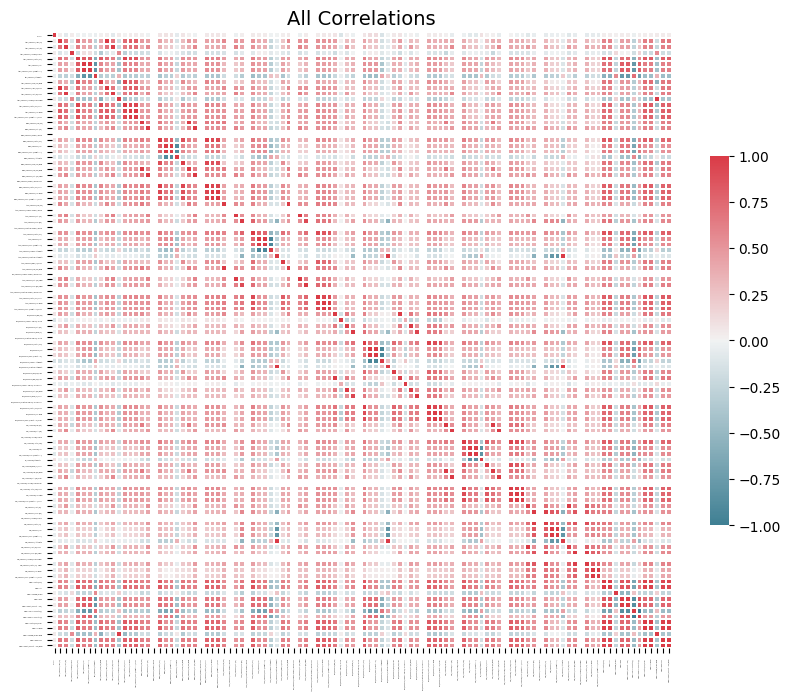

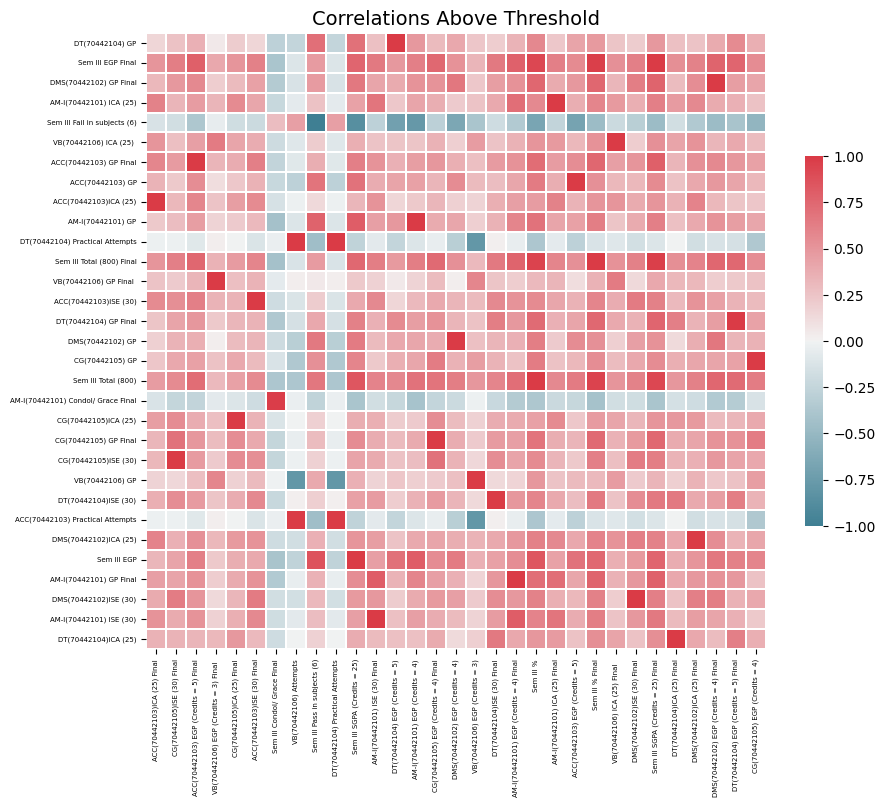

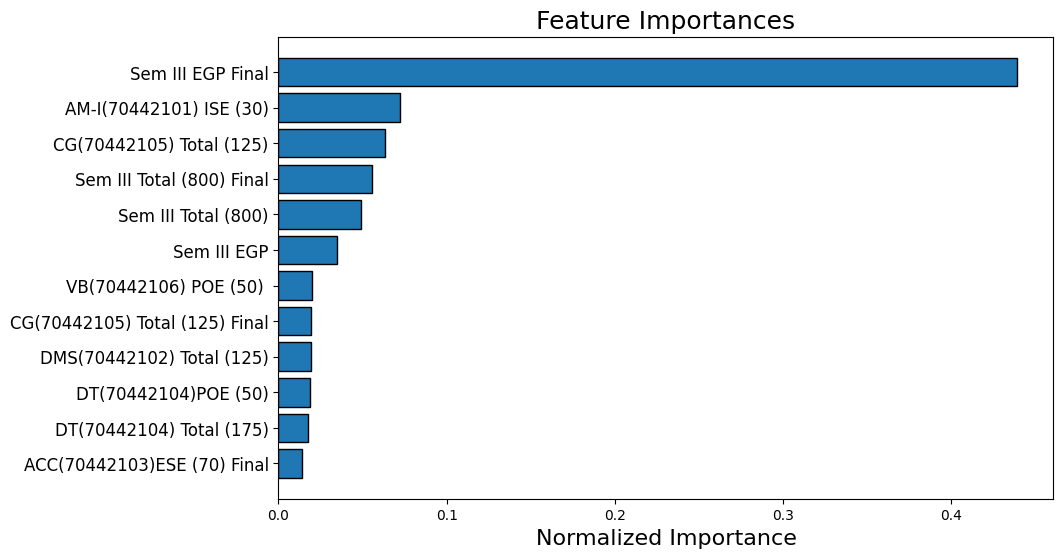

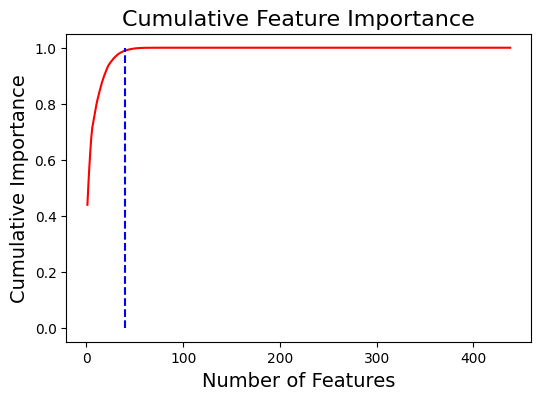

40 features required for 0.99 of cumulative importance
100
rank:  1  :  Sem III EGP Final
rank:  2  :  AM-I(70442101) ISE (30)
rank:  3  :  CG(70442105) Total (125)
rank:  4  :  Sem III Total (800) Final
rank:  5  :  Sem III Total (800)
rank:  6  :  Sem III EGP
rank:  7  :  VB(70442106) POE (50) 
rank:  8  :  CG(70442105) Total (125) Final
rank:  9  :  DMS(70442102) Total (125)
rank:  10  :  DT(70442104)POE (50)
rank:  11  :  DT(70442104) Total (175)
rank:  12  :  ACC(70442103)ESE (70) Final
rank:  13  :  CG(70442105)ESE (70) Final
rank:  14  :  Sr. No.
rank:  15  :  CG(70442105)ISE (30)
rank:  16  :  Sem III %
rank:  17  :  ACC(70442103) Total (175)
rank:  18  :  DMS(70442102)ISE (30)
rank:  19  :  DT(70442104) Total (175) Final
rank:  20  :  CG(70442105)ICA (25)
rank:  21  :  DMS(70442102) ESE (70) Final
rank:  22  :  AM-I(70442101) Total (125)
rank:  23  :  ACC(70442103) POE (50)
rank:  24  :  AM-I(70442101) Total (125) Final
rank:  25  :  AM-I(70442101) ICA (25)
rank:  26  :  VB(70

In [ ]:
default_preprocess(sem3)

#sem 4

   AM-II(70442201) ESE (70)  AM-II(70442201)  ISE (30)  \
0                        36                         24   
1                        29                         29   
2                        37                         30   
3                        61                         30   
4                        55                         25   

   AM-II(70442201) ICA (25)  AM-II(70442201) Condol/ Grace  \
0                        24                              0   
1                        19                              0   
2                        24                              0   
3                        25                              0   
4                        13                              0   

   AM-II(70442201) Total (125) AM-II(70442201) Grade  AM-II(70442201) GP  \
0                           84                    A                    8   
1                           77                    A                    8   
2                           91                   A

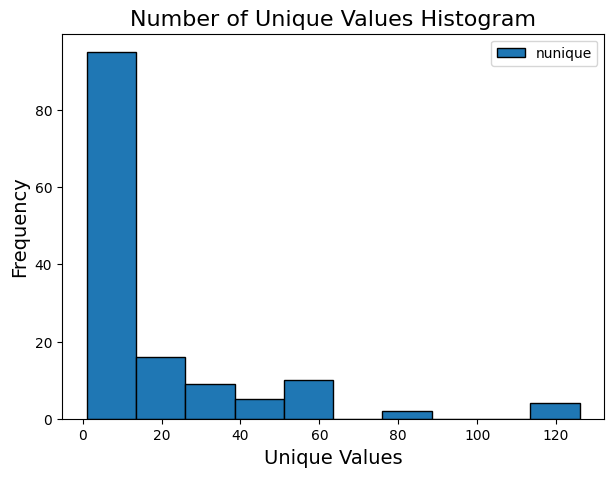

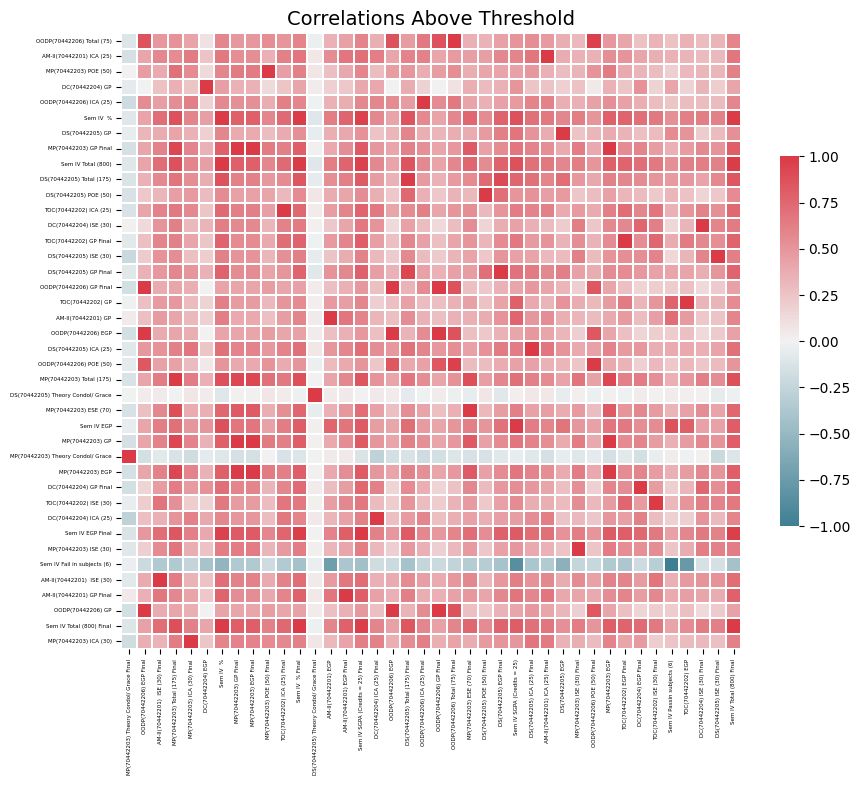

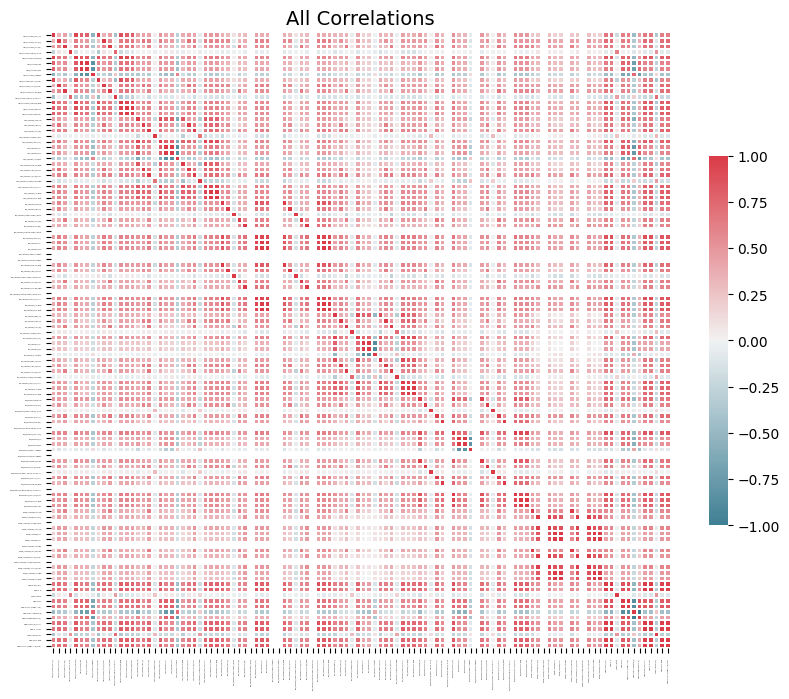

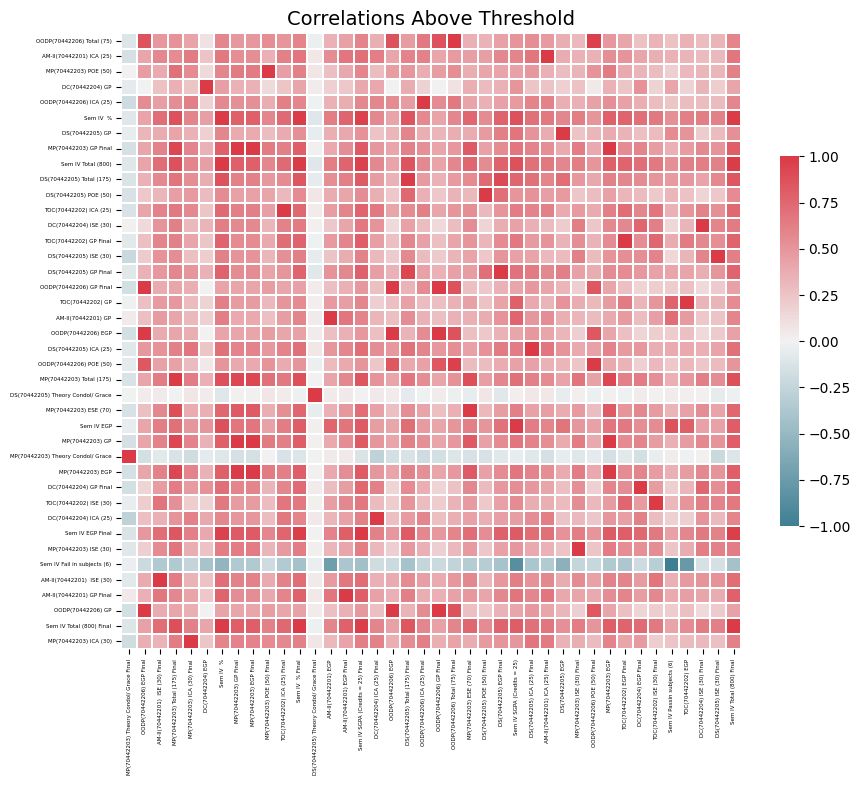

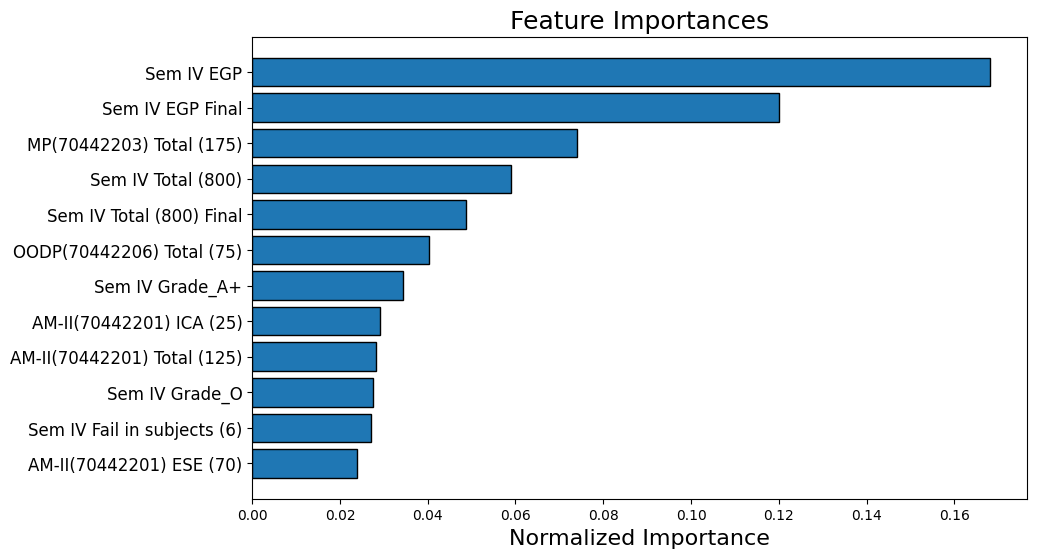

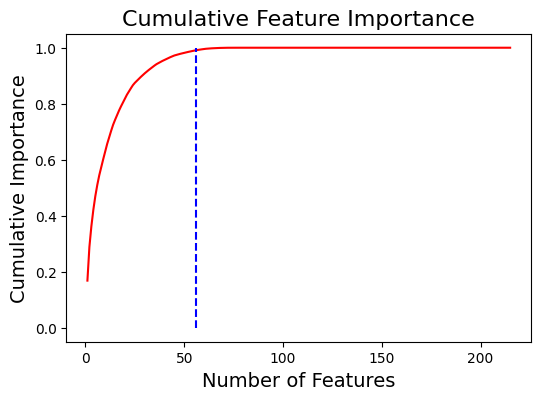

56 features required for 0.99 of cumulative importance
100
rank:  1  :  Sem IV EGP
rank:  2  :  Sem IV EGP Final
rank:  3  :  MP(70442203) Total (175)
rank:  4  :  Sem IV Total (800)
rank:  5  :  Sem IV Total (800) Final
rank:  6  :  OODP(70442206) Total (75)
rank:  7  :  Sem IV Grade_A+
rank:  8  :  AM-II(70442201) ICA (25)
rank:  9  :  AM-II(70442201) Total (125)
rank:  10  :  Sem IV Grade_O
rank:  11  :  Sem IV Fail in subjects (6)
rank:  12  :  AM-II(70442201) ESE (70)
rank:  13  :  Sem IV Grade_A
rank:  14  :  OODP(70442206) POE (50)
rank:  15  :  AM-II(70442201) Total (125) Final
rank:  16  :  MP(70442203) ESE (70)
rank:  17  :  TOC(70442202) ESE (70) Final
rank:  18  :  DC(70442204) ISE (30)
rank:  19  :  DC(70442204) Total (125)
rank:  20  :  DS(70442205) Total (175)
rank:  21  :  DS(70442205) ESE (70)
rank:  22  :  MP(70442203) POE (50)
rank:  23  :  DC(70442204)ESE (70)
rank:  24  :  TOC(70442202) Total (125)
rank:  25  :  MP(70442203) Grade_A 
rank:  26  :  DS(70442205) ISE 

In [ ]:
default_preprocess(sem4)

   OSC(70443101) ESE (70)  OSC(70443101) ISE (30) OSC(70443101) Theory Status  \
0                      38                      15                          P    
1                      31                      18                          P    
2                      50                      18                          P    
3                      61                      26                          P    
4                      54                      26                          P    

   OSC(70443101) Theory Condol/ Grace  OSC(70443101) ICA (25)  \
0                                   0                      22   
1                                   0                      15   
2                                   0                      16   
3                                   0                      23   
4                                   0                      24   

  OSC(70443101) POE (50) OSC(70443101) Practical Status  \
0                     21                             P    
1   

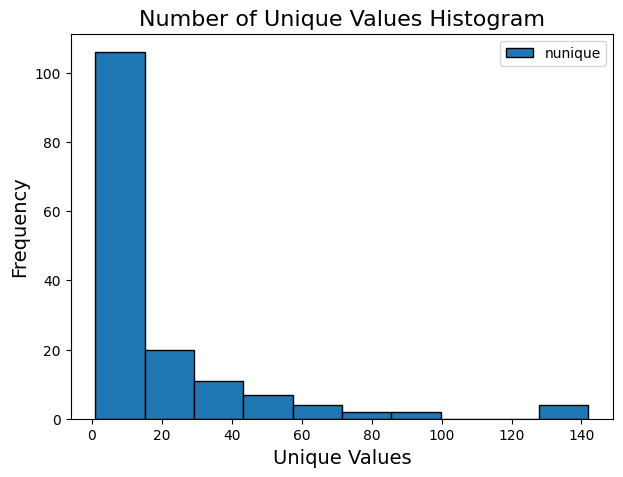

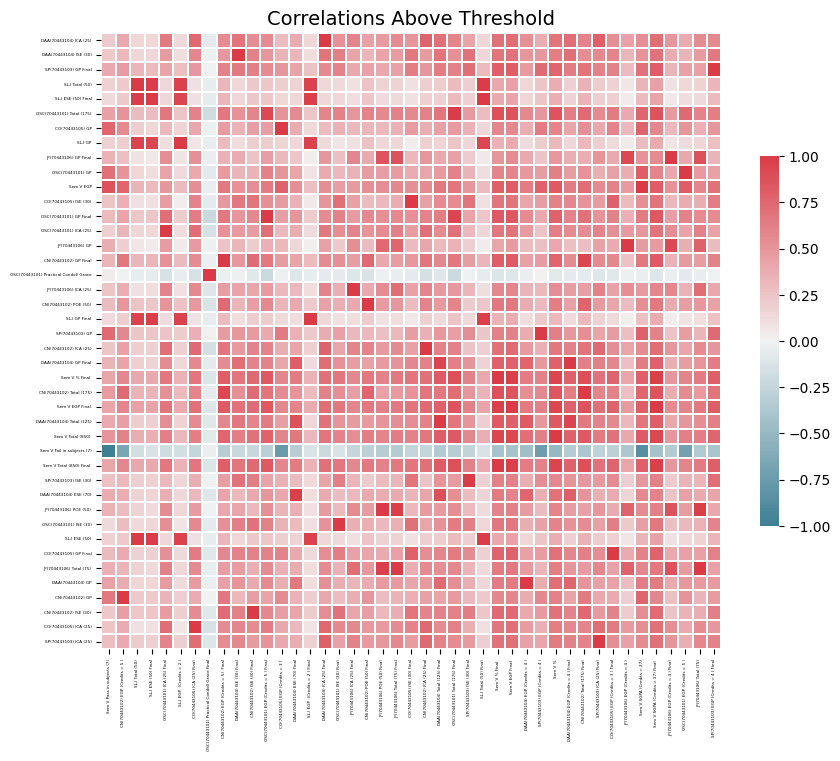

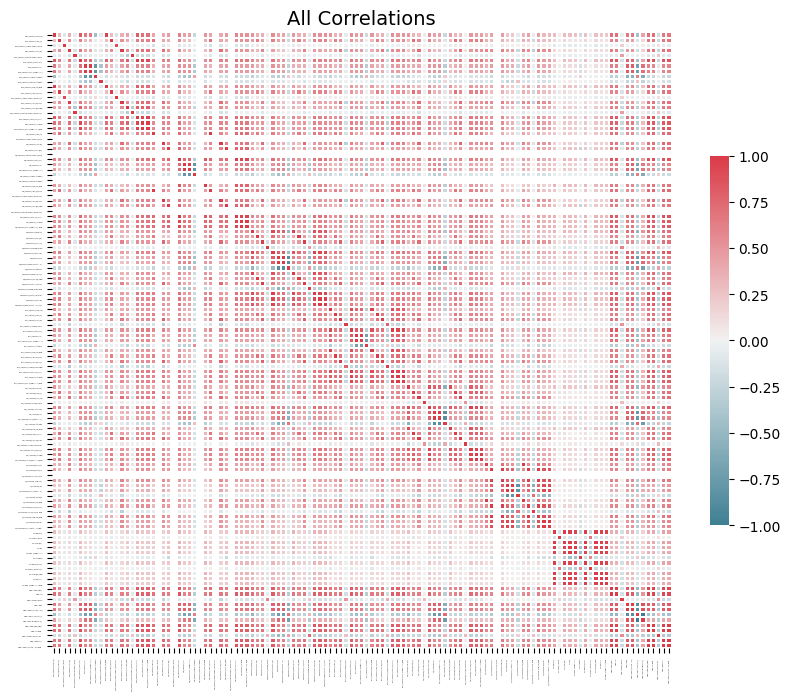

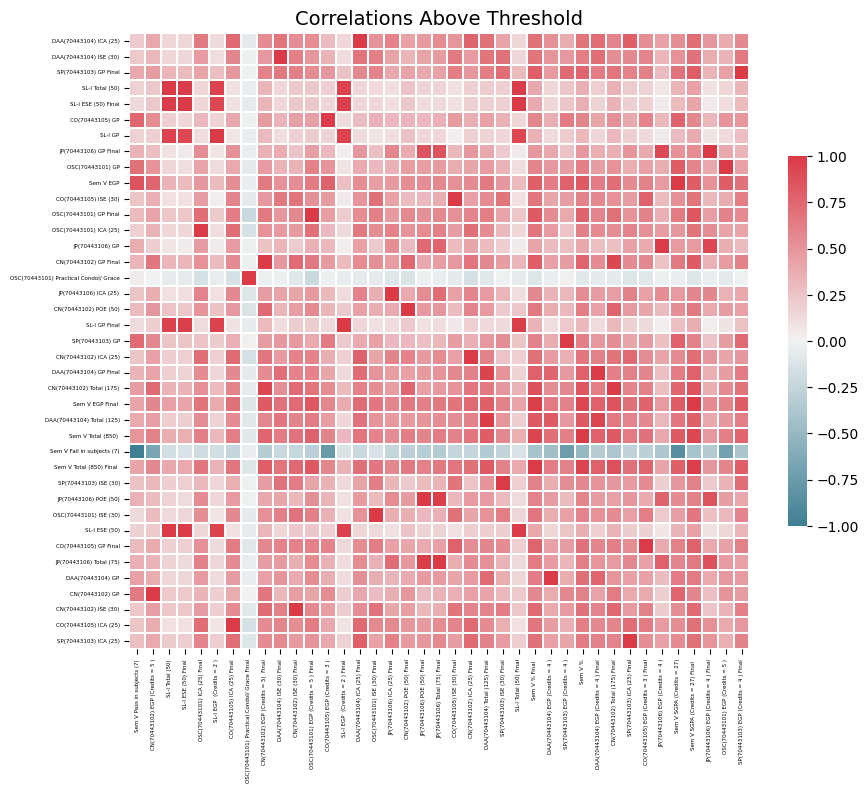

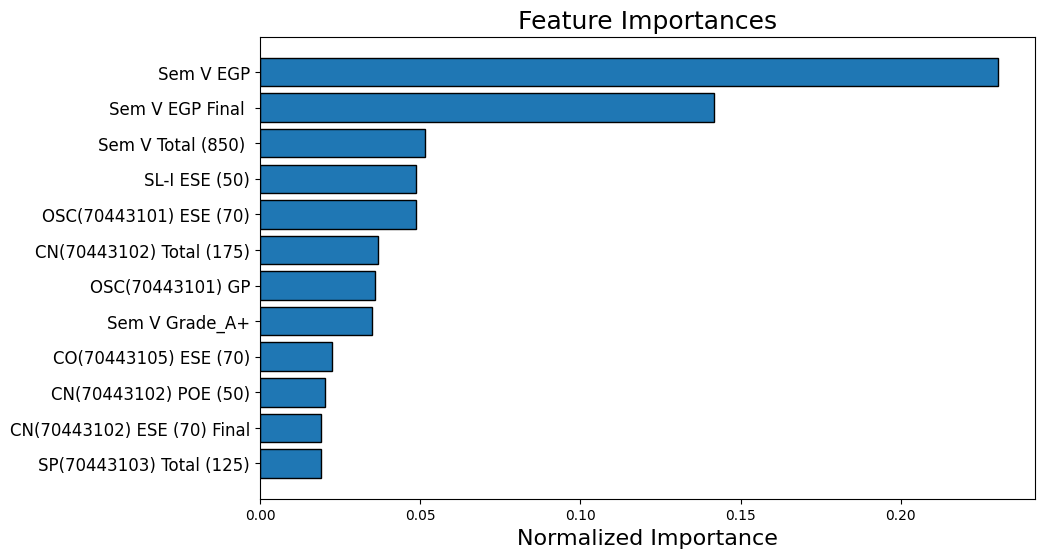

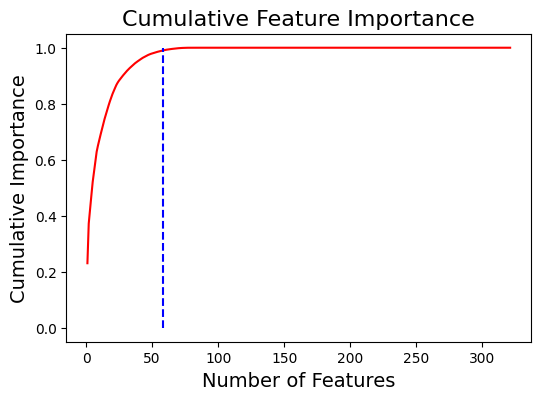

58 features required for 0.99 of cumulative importance
100
rank:  1  :  Sem V EGP
rank:  2  :  Sem V EGP Final 
rank:  3  :  Sem V Total (850) 
rank:  4  :  SL-I ESE (50)
rank:  5  :  OSC(70443101) ESE (70)
rank:  6  :  CN(70443102) Total (175)
rank:  7  :  OSC(70443101) GP
rank:  8  :  Sem V Grade_A+
rank:  9  :  CO(70443105) ESE (70)
rank:  10  :  CN(70443102) POE (50)
rank:  11  :  CN(70443102) ESE (70) Final
rank:  12  :  SP(70443103) Total (125)
rank:  13  :  OSC(70443101) Total (175)
rank:  14  :  Sem V Total (850) Final 
rank:  15  :  OSC(70443101) ICA (25)
rank:  16  :  CO(70443105) Total (125)
rank:  17  :  Sem V Grade_A
rank:  18  :  DAA(70443104) ISE (30)
rank:  19  :  DAA(70443104) Total (125)
rank:  20  :  DAA(70443104) ESE (70)
rank:  21  :  CN(70443102) ISE (30)
rank:  22  :  JP(70443106) Total (75)
rank:  23  :  OSC(70443101) ISE (30)
rank:  24  :  Sem V Fail in subjects (7)
rank:  25  :  SP(70443103) ESE (70)
rank:  26  :  JP(70443106) POE (50)
rank:  27  :  DAA(704431

In [ ]:
default_preprocess(sem5)

   DBE(70443201) ESE (70)  DBE(70443201) ISE (30) DBE(70443201) Theory Status  \
0                      35                      18                          P    
1                      19                      28                          F    
2                      33                      27                          P    
3                      54                      28                          P    
4                      49                      29                          P    

   DBE(70443201) Theory Condol/ Grace  DBE(70443201) ICA (25)  \
0                                   0                      20   
1                                   0                      23   
2                                   0                      24   
3                                   0                      23   
4                                   0                      25   

   DBE(70443201) POE (50) DBE(70443201) Practical Status  \
0                      30                             P    
1 

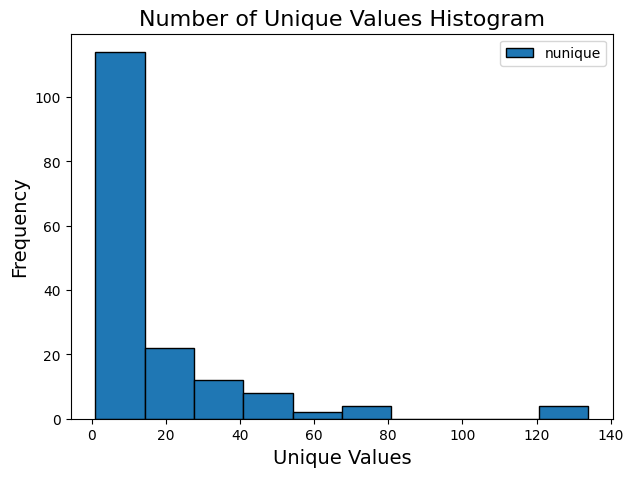

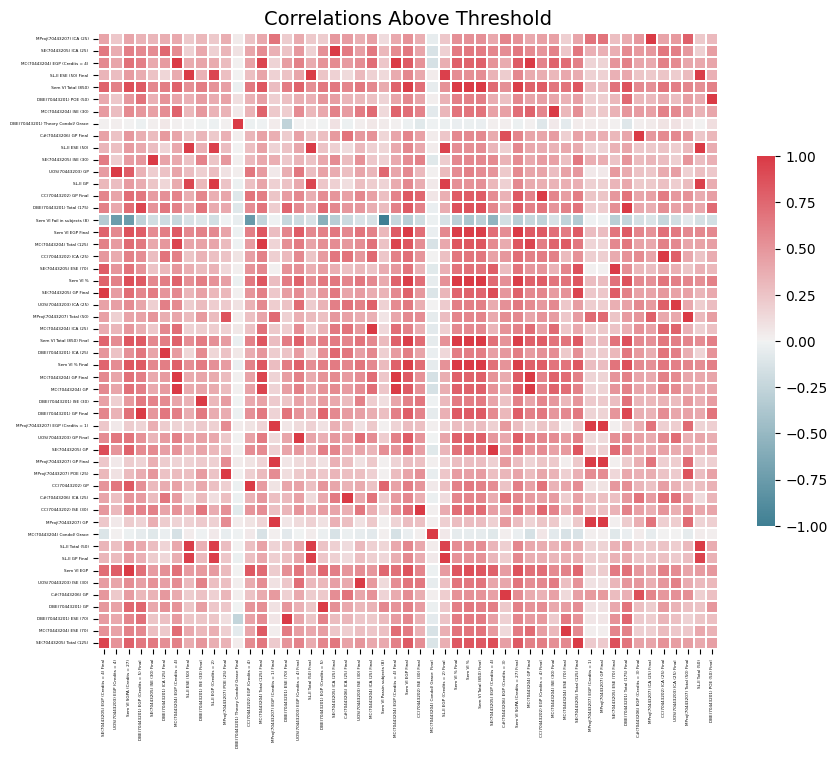

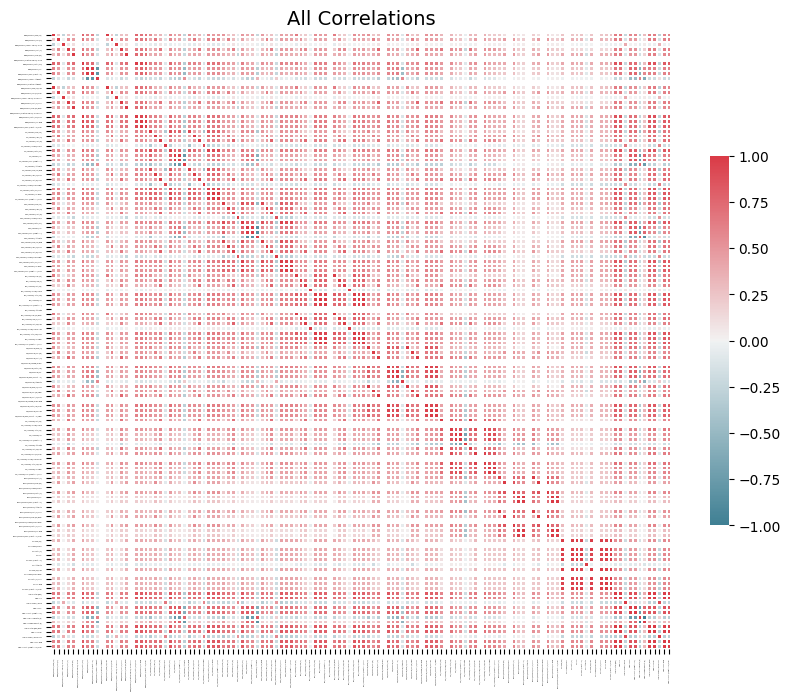

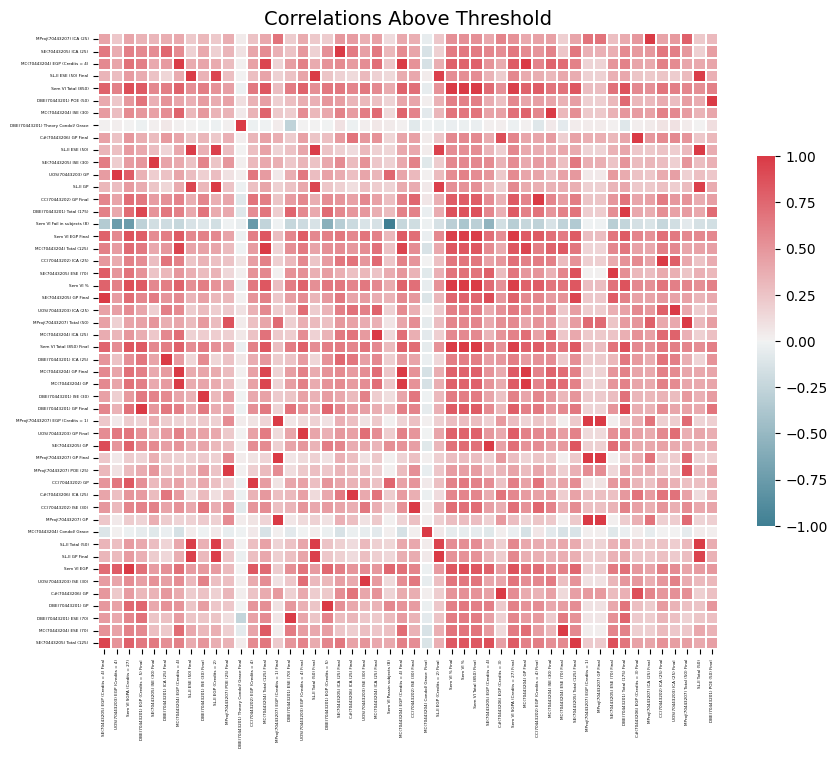

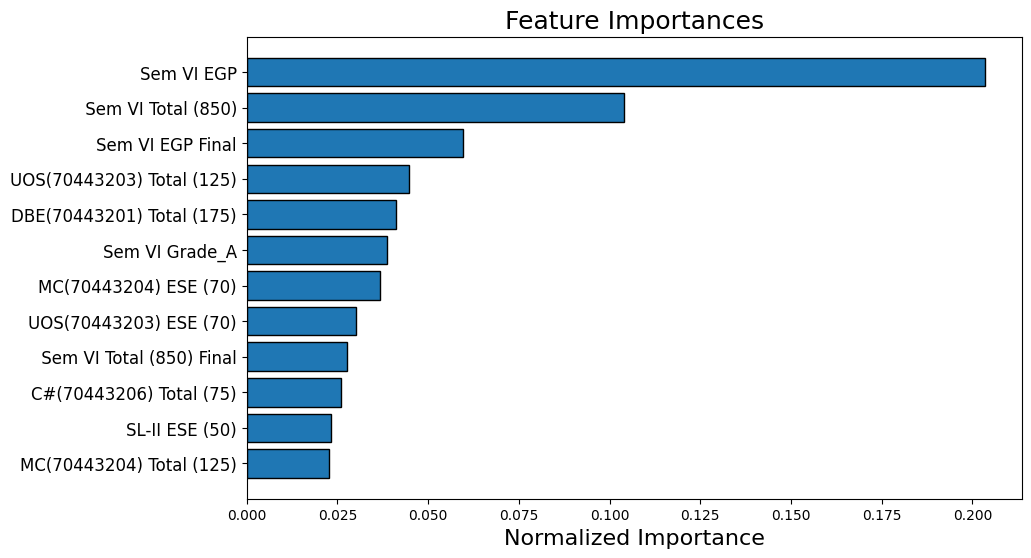

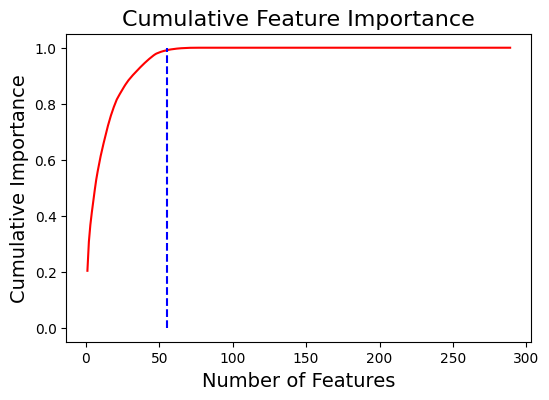

55 features required for 0.99 of cumulative importance
100
rank:  1  :  Sem VI EGP
rank:  2  :   Sem VI Total (850)
rank:  3  :  Sem VI EGP Final
rank:  4  :  UOS(70443203) Total (125)
rank:  5  :  DBE(70443201) Total (175)
rank:  6  :  Sem VI Grade_A
rank:  7  :  MC(70443204) ESE (70)
rank:  8  :  UOS(70443203) ESE (70)
rank:  9  :   Sem VI Total (850) Final
rank:  10  :  C#(70443206) Total (75)
rank:  11  :  SL-II ESE (50)
rank:  12  :  MC(70443204) Total (125)
rank:  13  :  UOS(70443203) GP
rank:  14  :  CC(70443202) ESE (70)
rank:  15  :  C#(70443206) POE (50) Final
rank:  16  :  Sem VI Grade_A+
rank:  17  :  CC(70443202) Total (125)
rank:  18  :  SE(70443205) Total (125)
rank:  19  :  DBE(70443201) ESE (70)
rank:  20  :  SE(70443205) ESE (70)
rank:  21  :  MC(70443204) ISE (30)
rank:  22  :  CC(70443202) ISE (30)
rank:  23  :  DBE(70443201) ICA (25)
rank:  24  :  MProj(70443207) Total (50)
rank:  25  :  MC(70443204) ICA (25)
rank:  26  :  UOS(70443203) Grade Final_A 
rank:  27  : 

In [ ]:
default_preprocess(sem6)

   ACA(70444101) ESE (70)  ACA(70444101) ISE (30)  ACA(70444101) ICA (25)  \
0                      38                      15                      22   
1                      43                      24                      20   
2                      43                      25                      21   
3                      52                      25                      23   
4                      41                      25                      24   

   ACA(70444101) Condol/ Grace  ACA(70444101) Total (125) ACA(70444101) Grade  \
0                            0                         75                  A    
1                            0                         87                  A    
2                            0                         89                 A+    
3                            0                        100                  O    
4                            0                         90                 A+    

   ACA(70444101) GP  ACA(70444101) EGP (Credits = 

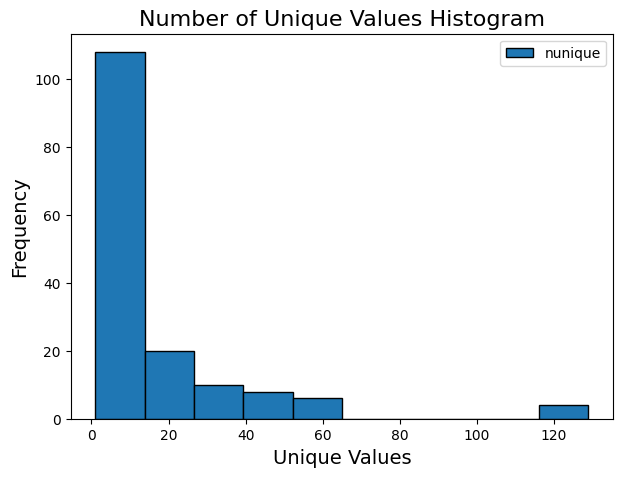

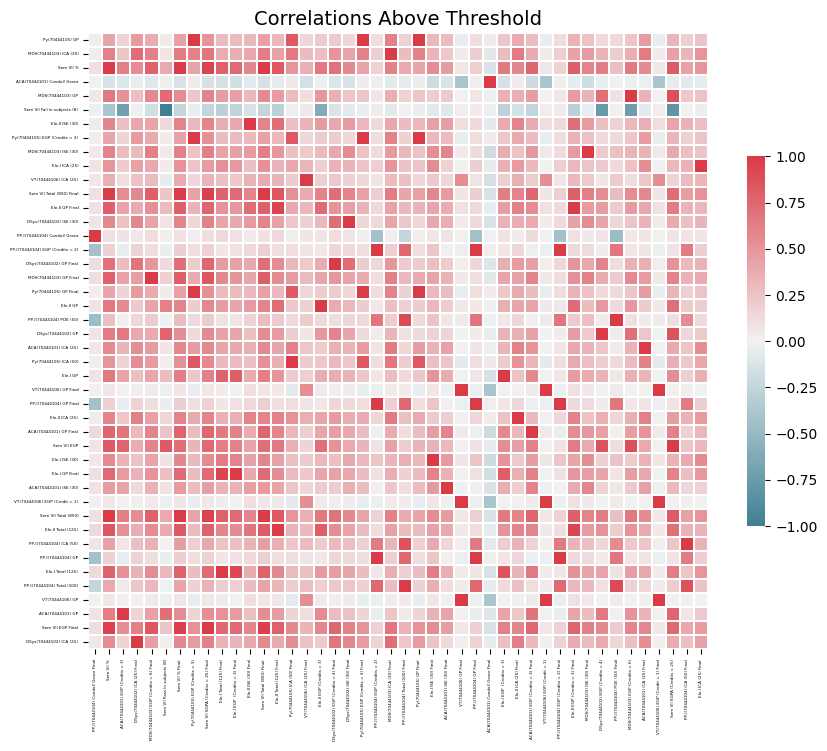

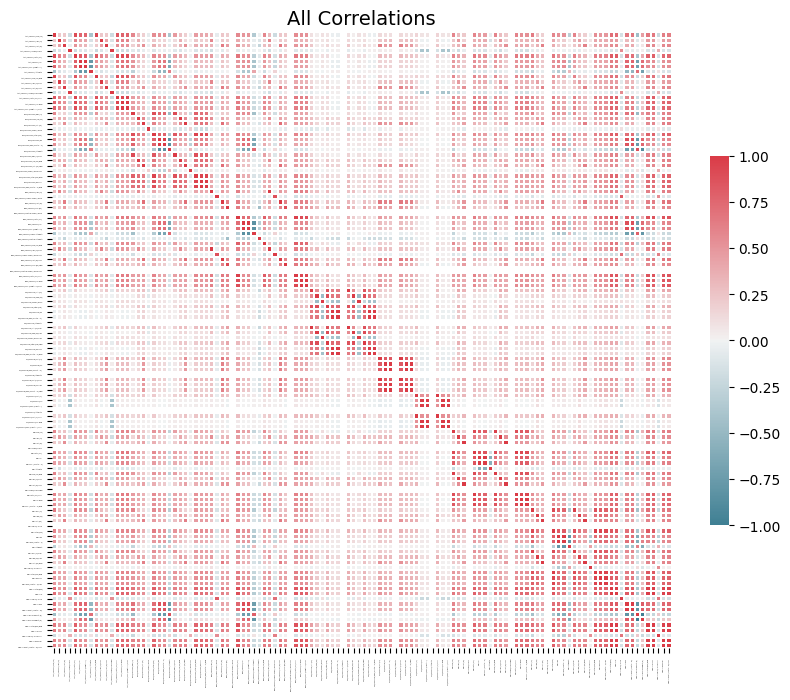

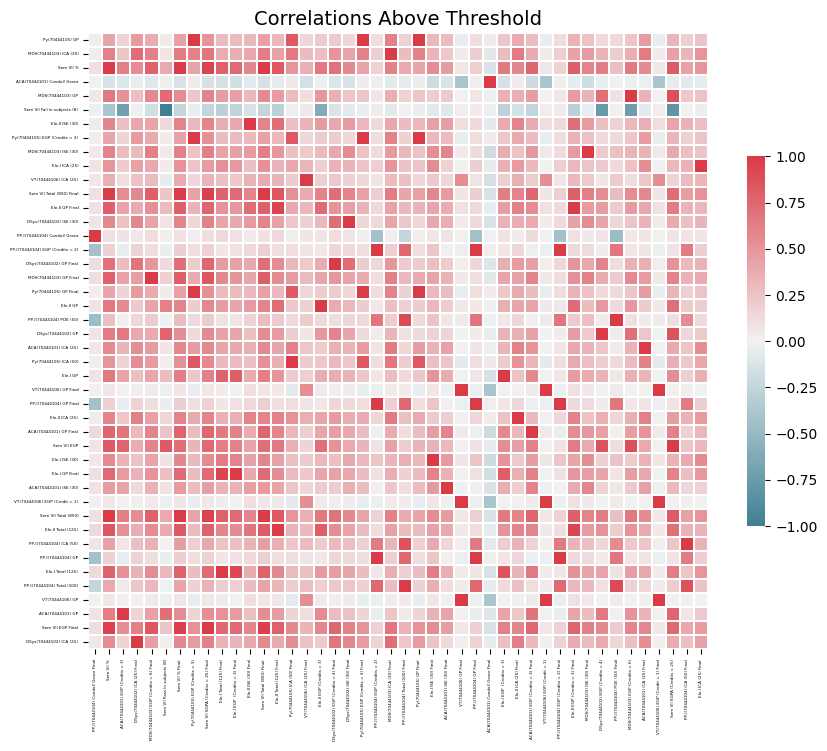

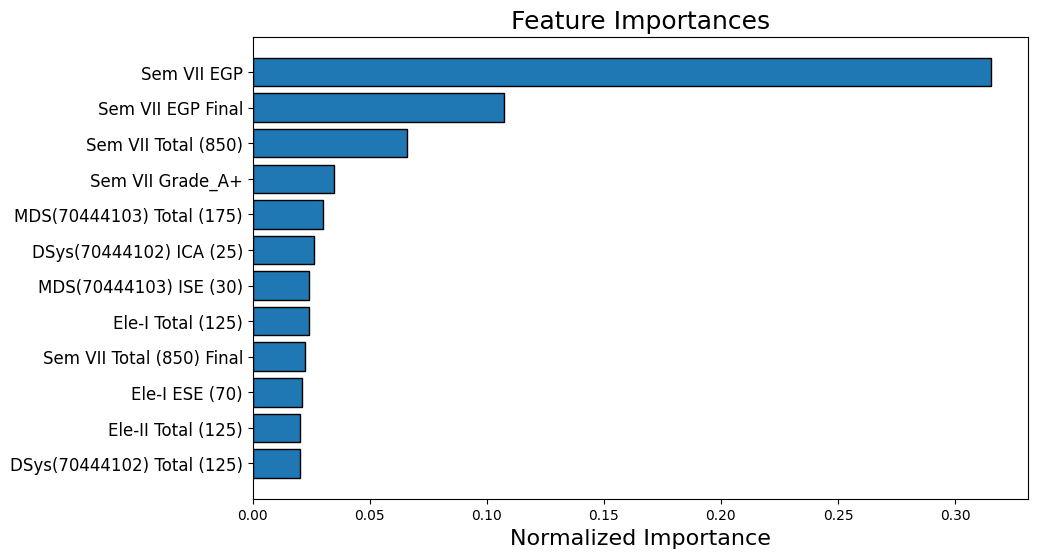

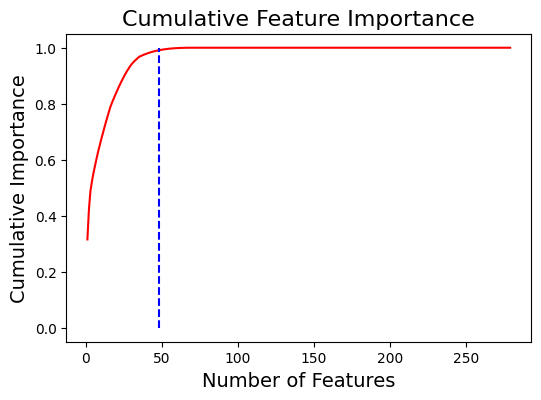

48 features required for 0.99 of cumulative importance
100
rank:  1  :  Sem VII EGP
rank:  2  :  Sem VII EGP Final
rank:  3  :  Sem VII Total (850)
rank:  4  :  Sem VII Grade_A+
rank:  5  :  MDS(70444103) Total (175)
rank:  6  :  DSys(70444102) ICA (25)
rank:  7  :  MDS(70444103) ISE (30)
rank:  8  :  Ele-I Total (125)
rank:  9  :  Sem VII Total (850) Final
rank:  10  :  Ele-I ESE (70)
rank:  11  :  Ele-II Total (125)
rank:  12  :  DSys(70444102) Total (125)
rank:  13  :  MDS(70444103) POE (50)
rank:  14  :  ACA(70444101) ESE (70)
rank:  15  :  Ele-II ESE (70)
rank:  16  :  Ele-II ISE (30)
rank:  17  :  Py(70444105) ICA (50)
rank:  18  :  Ele-I ICA (25)
rank:  19  :  DSys(70444102) ESE (70)
rank:  20  :  Ele-II Total (125) Final
rank:  21  :  Ele-I ISE (30)
rank:  22  :  VT(70444106) ICA (25)
rank:  23  :  MDS(70444103) ESE (70) Final
rank:  24  :  ACA(70444101) Total (125)
rank:  25  :  Ele-II ESE (70) Final
rank:  26  :  Sem VII Grade_A
rank:  27  :  ACA(70444101) ISE (30)
rank:  28 

In [ ]:
default_preprocess(sem7)

   MIS(70444201) ESE (70) MIS(70444201) ISE (30) MIS(70444201) ICA (25)  \
0                      40                     24                     22   
1                      47                     26                     21   
2                      39                     29                     24   
3                      55                     24                     23   
4                      55                     29                     24   

   MIS(70444201) Condol/ Grace  MIS(70444201) Total (125) MIS(70444201) Grade  \
0                            0                         86                  A    
1                            0                         94                 A+    
2                            0                         92                 A+    
3                            0                        102                  O    
4                            0                        108                  O    

   MIS(70444201) GP  MIS(70444201) EGP (Credits = 3) MIS(70444

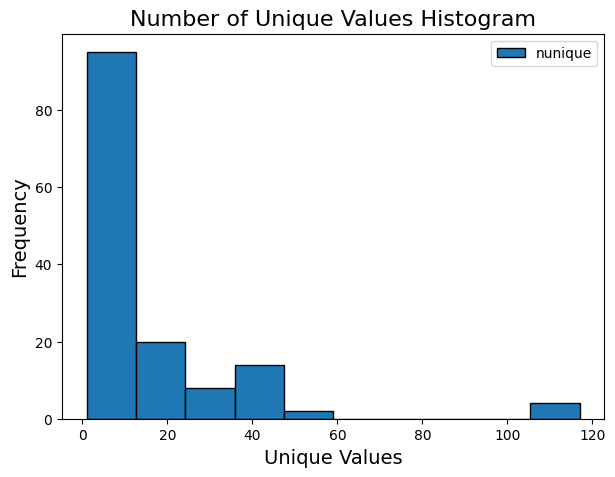

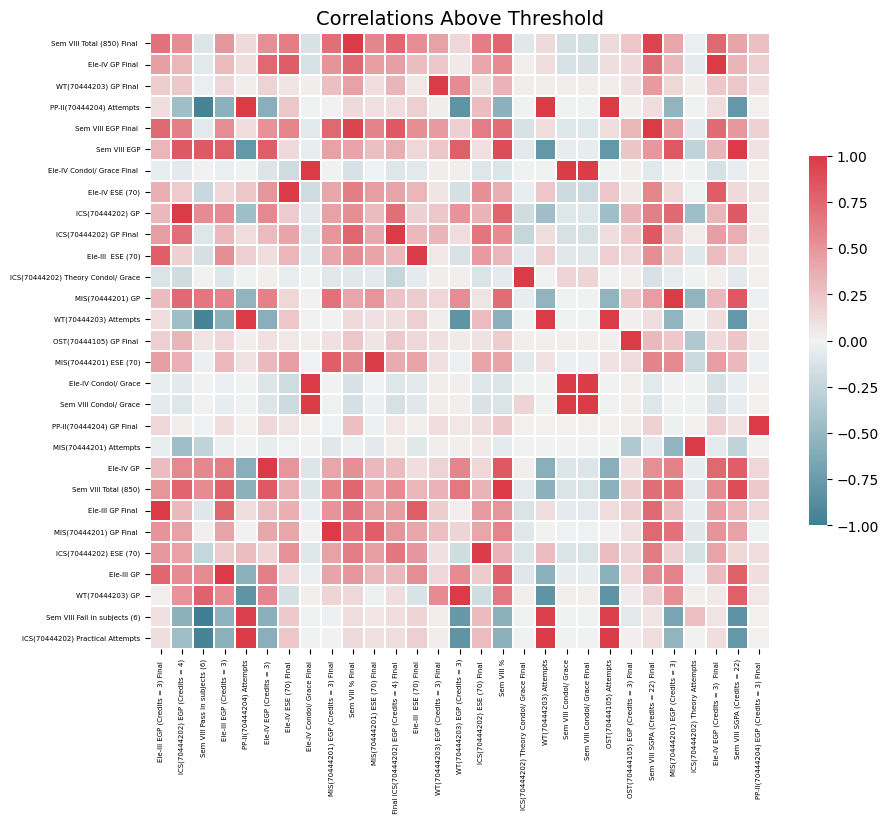

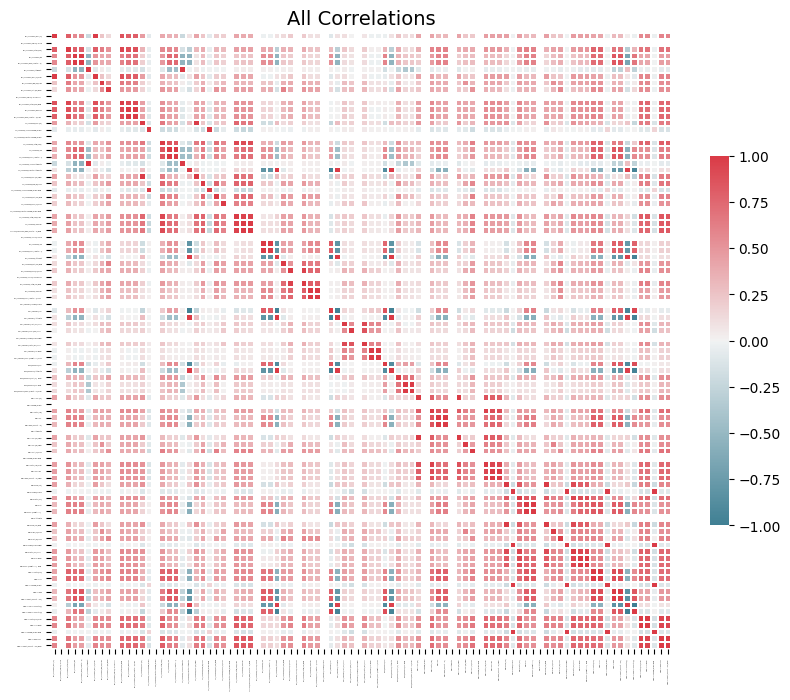

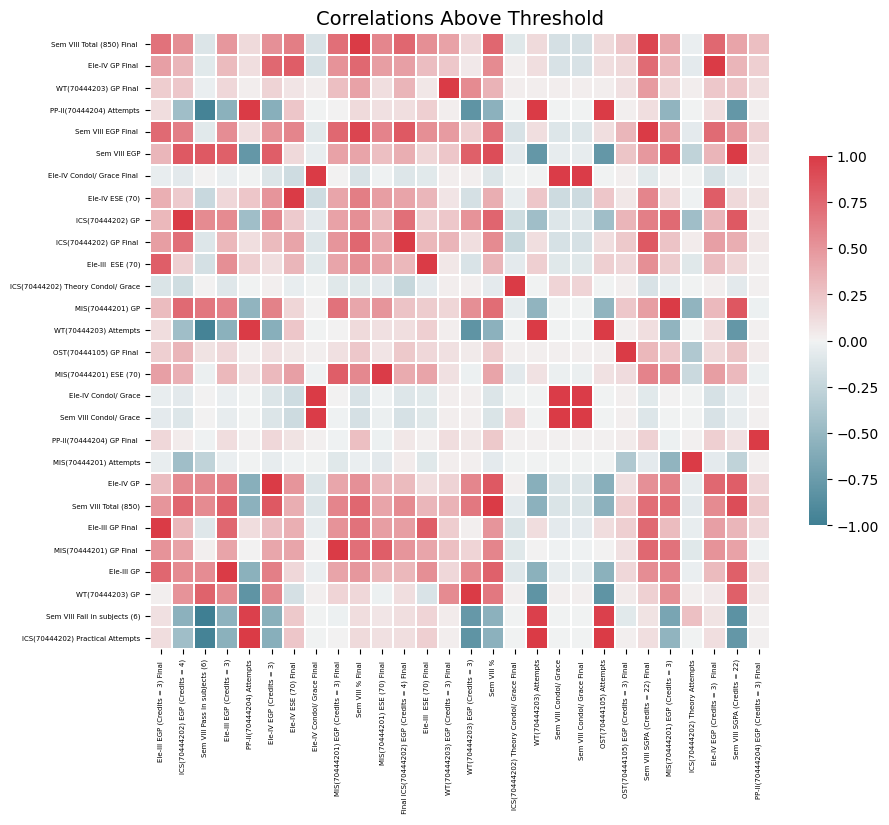

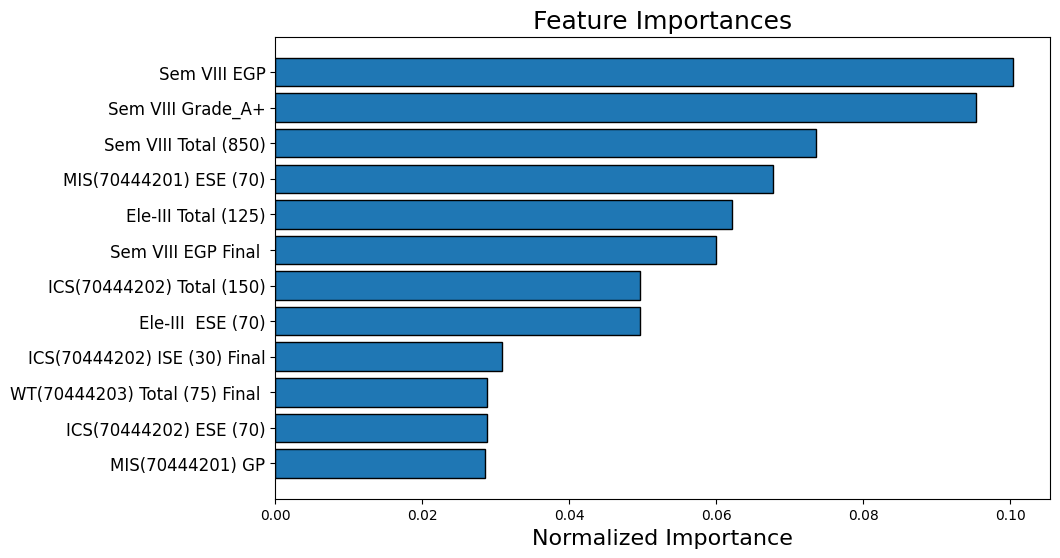

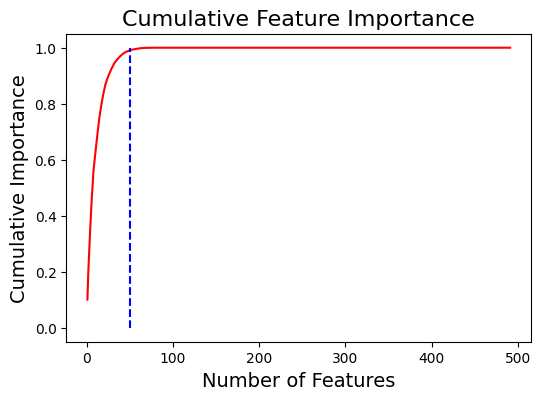

50 features required for 0.99 of cumulative importance
100
rank:  1  :  Sem VIII EGP
rank:  2  :  Sem VIII Grade_A+
rank:  3  :  Sem VIII Total (850)
rank:  4  :  MIS(70444201) ESE (70)
rank:  5  :  Ele-III Total (125)
rank:  6  :  Sem VIII EGP Final 
rank:  7  :  ICS(70444202) Total (150)
rank:  8  :  Ele-III  ESE (70)
rank:  9  :  ICS(70444202) ISE (30) Final
rank:  10  :  WT(70444203) Total (75) Final 
rank:  11  :  ICS(70444202) ESE (70)
rank:  12  :  MIS(70444201) GP
rank:  13  :  Sem VIII Grade_O
rank:  14  :  MIS(70444201) Total (125)
rank:  15  :  Sem VIII Total (850) Final 
rank:  16  :  Ele-IV Total (125)
rank:  17  :  OST(70444105) ICA (50)  Final 
rank:  18  :  WT(70444203) POE (50) Final 
rank:  19  :  ICS(70444202) ICA (25) Final
rank:  20  :  Ele-IV ESE (70)
rank:  21  :  Ele-III ICA (25) Final
rank:  22  :  ICS(70444202) GP
rank:  23  :  Ele-III Total (125) Final 
rank:  24  :  PP-II(70444204) ICA (100) Final
rank:  25  :  Ele-III Grade_A 
rank:  26  :  PP-II(70444204) 

In [ ]:
default_preprocess(sem8)

#After the above feature selection process and pre-processing we got a number of columns as our final features for the Research but since prediction of academic status is a critical task we need some human intervention to make sure the proper training for which the dataset needs to be evaluated by a domain expert. Therefore after thorough study on dataset and using the above feature selection preocess a final dataset was made and will be used below for further predictions and training.

#Defining Important Model and Model tuning classes containing 14 classification machine learning algorithms and their tuning using GridSearchCV

#Classification Model definitions

In [84]:
class Models:

  def __inint__(self, X_train, y_train, y_test, X_test):
    self.X_train = X_train
    self.y_train = y_train
    self.y_test = y_test
    self.X_test = X_test


  def LR(self, X_train, y_train, y_test, X_test):
    # Create a logistic regression object
    clf = LogisticRegression(random_state=0)
    # Train the model on the training data
    clf.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = clf.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def GNB(self, X_train, y_train, y_test, X_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)
    return gnb

  def DT(self, X_train, y_train, y_test, X_test):
    dt = DecisionTreeClassifier(random_state=0)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def RF(self, X_train, y_train, y_test, X_test):
    rfc = RandomForestClassifier(n_estimators=100, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def SVC(self, X_train, y_train, y_test, X_test):
    # Create an SVM object
    svc = SVC(random_state=0)
    svc.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = svc.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def KNN(self, X_train, y_train, y_test, X_test):
    # Create a KNN object
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = knn.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)


  def GB(self, X_train, y_train, y_test, X_test):
    # Create a Gradient Boosting object
    gb = GradientBoostingClassifier(random_state=0)
    gb.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = gb.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def ADAB(self, X_train, y_train, y_test, X_test):
    # Create an AdaBoost object
    ada = AdaBoostClassifier(random_state=0)
    ada.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = ada.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def BAG(self, X_train, y_train, y_test, X_test):
    # Create a Bagging object
    tree = DecisionTreeClassifier(random_state=0)
    bag = BaggingClassifier(tree, random_state=0)
    bag.fit(X_train, y_train)

    # Predict the classes of the testing data
    y_pred = bag.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def XGB(self, X_train, y_train, y_test, X_test):
    xgb = XGBClassifier(random_state=0)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def LGB(self, X_train, y_train, y_test, X_test):
    # Create a LightGBM object
    lgbm = lgb.LGBMClassifier(random_state=0)
    lgbm.fit(X_train, y_train)

    # Predict the classes of the testing data
    y_pred = lgbm.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def CB(self, X_train, y_train, y_test, X_test):
    cat = CatBoostClassifier(random_state=0, verbose=0)
    cat.fit(X_train, y_train)

    #Predict the classes of the testing data
    y_pred = cat.predict(X_test)
    #Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def LDA(self, X_train, y_train, y_test, X_test):
    # Create a LinearDiscriminantAnalysis object and fit the model to the training data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = lda.predict(X_test)

    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)
    return lda

  def QDA(self, X_train, y_train, y_test, X_test):
    #Create a QuadraticDiscriminantAnalysis object
    qda = QuadraticDiscriminantAnalysis()
    #Train the model on the training data
    qda.fit(X_train, y_train)

    #Predict the classes of the testing data
    y_pred = qda.predict(X_test)
    #Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)


    return qda


In [85]:
#Making object of the class Models
model = Models()

#Model Tuning

In [75]:
class Model_tuning:

  def __inint__(self, X_train, y_train, y_test, X_test):
    self.X_train = X_train
    self.y_train = y_train
    self.y_test = y_test
    self.X_test = X_test

  def LR_t(self, X_train, y_train, y_test, X_test):
    param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2']}
    LR_t = LogisticRegression(random_state=0)
    #Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(LR_t, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  
    #Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    LR_t = LogisticRegression(**best_params, random_state=0)
    LR_t.fit(X_train, y_train)
    #Predict the classes of the testing data
    y_pred = LR_t.predict(X_test)

    #Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    print("#######################################################################")
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print("#######################################################################")
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return LR_t

  def GNB_t(self, X_train, y_train, y_test, X_test):
    # Create a Gaussian Naive Bayes object
    gnb = GaussianNB()

    # Define the hyperparameter grid to search over
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

    # Create a GridSearchCV object and fit it to the training data
    gnb = GridSearchCV(gnb, param_grid, cv=10, scoring='accuracy')
    gnb.fit(X_train, y_train)

    #  Predict the classes of the testing data using the best estimator found by GridSearchCV
    y_pred = gnb.best_estimator_.predict(X_test)

    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return gnb

  def DT_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid
    param_grid = {'max_depth': [3, 5, 7, None], 
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

    # Create a decision tree object
    dt = DecisionTreeClassifier(random_state=0)
    # Create a GridSearchCV object with 5-fold cross-validation
    dt_cv = GridSearchCV(dt, param_grid, cv=5)

    # Train the model on the training data
    dt_cv.fit(X_train, y_train)
    # Print the best parameters and best score
    print('Best Parameters:', dt_cv.best_params_)
    print('Best Score:', dt_cv.best_score_)
    # Predict the classes of the testing data using the best model
    y_pred = dt_cv.predict(X_test)

    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return dt_cv

  def RF_t(self, X_train, y_train, y_test, X_test):
    # Set the parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }
    # Create a random forest classifier object
    rfc = RandomForestClassifier(random_state=0)
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
    # Train the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)
    # Print the best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    # Predict the classes of the testing data using the best estimator from the GridSearchCV
    y_pred = grid_search.best_estimator_.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    print("=======================================================================")
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print("=======================================================================")
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return grid_search

  def SVC_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}
    # Create an SVM object
    svc = SVC(random_state=0)
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    svc = SVC(**best_params, probability=True, random_state=0)
    svc.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = svc.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    print("=======================================================================")
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print("=======================================================================")
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return svc

  def KNN_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

    # Create a KNN object
    knn = KNeighborsClassifier()

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = knn.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    print("=======================================================================")
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print("=======================================================================")
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return knn


  def GB_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1.0]}
    # Create a Gradient Boosting object
    gb = GradientBoostingClassifier(random_state=0)
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(gb, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    gb = GradientBoostingClassifier(**best_params, random_state=0)
    gb.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = gb.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    print("=======================================================================")
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print("=======================================================================")
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return gb

  def ADAB_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
    # Create an AdaBoost object
    ada = AdaBoostClassifier(random_state=0)

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(ada, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    ada = AdaBoostClassifier(**best_params, random_state=0)
    ada.fit(X_train, y_train)

    # Predict the classes of the testing data
    y_pred = ada.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return ada

  def BAG_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {'n_estimators': [50, 100, 150], 'max_samples': [0.5, 0.7, 1.0], 'max_features': [0.5, 0.7, 1.0]}
    # Create a Bagging object
    tree = DecisionTreeClassifier(random_state=0)
    bag = BaggingClassifier(tree, random_state=0)
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(bag, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    bag = BaggingClassifier(tree, **best_params, random_state=0)
    bag.fit(X_train, y_train)

    # Predict the classes of the testing data
    y_pred = bag.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return bag

  def XGB_t(self, X_train, y_train, y_test, X_test):
    param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]}
    xgb = XGBClassifier(random_state=0)
    grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    xgb = XGBClassifier(**best_params, random_state=0)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return xgb

  def LGB_t(self, X_train, y_train, y_test, X_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {'num_leaves': [31, 63, 127], 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [50, 100, 150]}

    # Create a LightGBM object
    lgbm = lgb.LGBMClassifier(random_state=0)

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(lgbm, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    lgbm = lgb.LGBMClassifier(**best_params, random_state=0)
    lgbm.fit(X_train, y_train)

    # Predict the classes of the testing data
    y_pred = lgbm.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return lgbm

  def CB_t(self, X_train, y_train, y_test, X_test):
    #Define the parameter grid for GridSearchCV
    param_grid = {'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [50, 100, 150], 'depth': [4, 6, 8]}

    #Create a CatBoost object
    cat = CatBoostClassifier(random_state=0, verbose=0)
    #Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(cat, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    #Get the best hyperparameters and train the model on the training data
    best_params = grid_search.best_params_
    cat = CatBoostClassifier(**best_params, random_state=0, verbose=0)
    cat.fit(X_train, y_train)
    #Predict the classes of the testing data
    y_pred = cat.predict(X_test)

    #Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

    return cat

  def LDA_t():
    print("LDA has no Parameter Tuning")

  def QDA_t():
    print("QDA has no parameter tuning")


In [76]:
modelt = Model_tuning()

#PreProcess

In [32]:
def preprocess(df,target):
  # Split the data into input features (X) and target variable (y)
  X = df.drop(target, axis=1)  # Input features
  y = df[target]  # Target variable
  # Convert the target variable to numeric values using label encoding
  le = LabelEncoder()
  y = le.fit_transform(y)
  cat_cols = X.select_dtypes(include=['category','object']).columns.tolist()

  print(cat_cols)
  # Convert categorical features into numerical values using one-hot encoding
  categorical_cols = cat_cols
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  X_cat = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))
  X_cat.columns = ohe.get_feature_names_out(categorical_cols)
  X_num = X.drop(categorical_cols, axis=1)
  X = pd.concat([X_num, X_cat], axis=1)
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  print("Shape of training split: ", X_train.shape)
  print("Shape of test split: ", X_test.shape)

  return X_train, X_test, y_train, y_test

#importing CSV 

In [33]:
df = pd.read_excel('/content/drive/MyDrive/Dashborad_academics/prediction_dataset1.xlsx')

In [34]:
col = df.columns

In [35]:
df.shape

(200, 492)

#Printing columns and their index numbers

In [36]:
for i in range(0,492):
  print(i,col[i])

0 Sr. No.
1 AM-I(70442101)Attempts
2 AM-I(70442101) ESE (70) Final
3 AM-I(70442101) ISE (30) Final
4 AM-I(70442101) ICA (25) Final
5 AM-I(70442101) Condol/ Grace Final
6 AM-I(70442101) Total (125) Final
7 AM-I(70442101)Grade Final
8 AM-I(70442101) GP Final
9 AM-I(70442101) EGP (Credits = 4) Final
10 AM-I(70442101) Status Final
11 DMS(70442102) Attempts
12 DMS(70442102) ESE (70) Final
13 DMS(70442102)ISE (30) Final
14 DMS(70442102)ICA (25) Final
15 DMS(70442102)Condol/ Grace Final
16 DMS(70442102) Total (125) Final
17 DMS(70442102)Grade Final
18 DMS(70442102) GP Final
19 DMS(70442102) EGP (Credits = 4) Final
20 DMS(70442102) Status Final
21 ACC(70442103) Practical Status
22 ACC(70442103) Theory Attempts
23 ACC(70442103) Practical Attempts
24 ACC(70442103)ESE (70) Final
25 ACC(70442103)ISE (30) Final
26 ACC(70442103)ICA (25) Final
27 ACC(70442103) POE (50) Final
28 ACC(70442103) Practical Condol/ Grace Final
29 ACC(70442103) Total (175) Final
30 ACC(70442103)Grade Final
31 ACC(70442103) 

#Distrubuting data semester wise to get predictions and suggestions semester wise

In [12]:
#semester wise distribution
sem3 = df.iloc[:,1:75]
sem4 = df.iloc[:,75:149]
sem34 = df.iloc[:,149:157]
sem5 = df.iloc[:,157:239]
sem6 = df.iloc[:,239:327]
sem56 = df.iloc[:,327:335]
sem7 = df.iloc[:,335:418]
sem8 = df.iloc[:,418:494]
sem78 = df.iloc[:,494:502]
grandtotal = df.iloc[:,502:508]

#Distributing data subject wise to get predictions and suggestions subject wise

In [13]:
#subject wise distribution
am1 = df.iloc[:,1:11]
dms = df.iloc[:,11:21]
acc = df.iloc[:,21:34]
dt = df.iloc[:,34:47]
cg = df.iloc[:,47:57]
vb = df.iloc[:,57:66]
sem_3 = df.iloc[:,66:75]
am2 = df.iloc[:,75:85]
toc = df.iloc[:,85:95]
mp = df.iloc[:,95:108]
dc = df.iloc[:,108:118]
ds = df.iloc[:,118:131]
oodp = df.iloc[:,131:140]
sem_4 = df.iloc[:,140:157]
osc = df.iloc[:,157:170]
cn = df.iloc[:,170:183]
sp = df.iloc[:,183:193]
daa = df.iloc[:,193:203]
co = df.iloc[:,203:213]
jp = df.iloc[:,213:222]
sl1 = df.iloc[:,222:230]
sem_5 = df.iloc[:,230:239]
dbe = df.iloc[:,239:252]
cc = df.iloc[:,252:262]
uos = df.iloc[:,262:272]
mc = df.iloc[:,272:282]
se = df.iloc[:,282:292]
c = df.iloc[:,292:301]
mpj = df.iloc[:,301:310]
sl2 = df.iloc[:310:318]
sem_6 = df.iloc[:,318:335]
aca = df.iloc[:,335:345]
dsys = df.iloc[:,345:355]
mds = df.iloc[:,355:368]
pp1 = df.iloc[:,368:377]
py = df.iloc[:,377:383]
vt = df.iloc[:,383:389]
el1 = df.iloc[:,389:399]
el2 = df.iloc[:,399:409]
sem_7 = df.iloc[:,409:418]
mis = df.iloc[:,418:428]
ics = df.iloc[:,428:441]
wt = df.iloc[:,441:450]
pp2 = df.iloc[:,450:459]
ost = df.iloc[:,459:465]
el3 = df.iloc[:,465:475]
el4 = df.iloc[:,475:485]
sem_8 = df.iloc[:,485:502]

#Only taking grade columns for predictions and then getting the suggestions 

#data viz | sem - 3

In [ ]:
sem3.head()

,AM-I(70442101)Attempts,AM-I(70442101) ESE (70) Final,AM-I(70442101) ISE (30) Final,AM-I(70442101) ICA (25) Final,AM-I(70442101) Condol/ Grace Final,AM-I(70442101) Total (125) Final,AM-I(70442101)Grade Final,AM-I(70442101) GP Final,AM-I(70442101) EGP (Credits = 4) Final,AM-I(70442101) Status Final,...,VB(70442106) Total (75) Final,VB(70442106) Grade Final,VB(70442106) GP Final,VB(70442106) EGP (Credits = 3) Final,VB(70442106) Status Final,Sem III Pass in subjects (6),Sem III Total (800) Final,Sem III % Final,Sem III Condol/ Grace Final,Sem III Grade Final
0,1,32,28,23,0,83,A,8,32,P,...,67,O,10,30,P,6,571,71.38,0,A+
1,1,29,25,19,0,73,B+,7,28,P,...,61,O,10,30,P,6,533,66.63,2,A
2,1,64,30,24,0,118,O,10,40,P,...,73,O,10,30,P,6,674,84.25,0,O
3,1,53,25,22,0,100,O,10,40,P,...,68,O,10,30,P,6,625,78.13,0,A+
4,1,31,25,24,0,80,A,8,32,P,...,70,O,10,30,P,6,636,79.50,0,O


In [ ]:
sem3.shape

(200, 71)

In [37]:
target = "Sem III Grade Final"

In [38]:
X_train, X_test, y_train, y_test = preprocess(sem3,target)

['AM-I(70442101)Grade Final', 'AM-I(70442101) Status Final', 'DMS(70442102)Grade Final', 'DMS(70442102) Status Final', 'ACC(70442103) Practical Status', 'ACC(70442103)Grade Final', 'ACC(70442103) Status Final', 'DT(70442104) Practical Status', 'DT(70442104)Grade Final', 'DT(70442104) Status Final', 'CG(70442105) Grade Final', 'CG(70442105) Status Final', 'VB(70442106) Grade Final', 'VB(70442106) Status Final']
Shape of training split:  (160, 97)
Shape of test split:  (40, 97)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.65
Confusion Matrix:
 [[ 5  3  0  0]
 [ 4 16  0  2]
 [ 2  0  0  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.73      0.73      0.73        22
           2       0.00      0.00      0.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.65        40
   macro avg       0.47      0.49      0.48        40
weighted avg       0.63      0.65      0.64        40



In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.7
#######################################################################
Confusion Matrix:
 [[ 5  3  0  0]
 [ 2 19  0  1]
 [ 2  0  0  0]
 [ 0  4  0  4]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.73      0.86      0.79        22
           2       0.00      0.00      0.00         2
           3       0.80      0.50      0.62         8

    accuracy                           0.70        40
   macro avg       0.52      0.50      0.50        40
weighted avg       0.67      0.70      0.68        40



#Gaussian Naive Bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.7
Confusion Matrix:
 [[ 6  2  0  0]
 [ 0 15  0  7]
 [ 1  0  1  0]
 [ 0  2  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.79      0.68      0.73        22
           2       1.00      0.50      0.67         2
           3       0.46      0.75      0.57         8

    accuracy                           0.70        40
   macro avg       0.78      0.67      0.69        40
weighted avg       0.75      0.70      0.71        40



In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 18  0  4]
 [ 0  0  2  0]
 [ 0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.95      0.82      0.88        22
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         8

    accuracy                           0.88        40
   macro avg       0.90      0.92      0.90        40
weighted avg       0.90      0.88      0.88        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[ 6  2  0  0]
 [ 3 17  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.77      0.77      0.77        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.75        40
   macro avg       0.79      0.79      0.79        40
weighted avg       0.75      0.75      0.75        40



In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.825
Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.82      0.82      0.82        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.80      0.80      0.80        40



#Random Forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 8  0  0  0]
 [ 0 20  0  2]
 [ 1  0  1  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.87      0.91      0.89        22
           2       1.00      0.50      0.67         2
           3       0.71      0.62      0.67         8

    accuracy                           0.85        40
   macro avg       0.87      0.76      0.79        40
weighted avg       0.85      0.85      0.84        40



In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score:  0.88125
Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 2  0  0  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.80      0.91      0.85        22
           2       0.00      0.00      0.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.56      0.57      0.56        40
weighted avg       0.73      0.78      0.75        40



#Support Vector Classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.7
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 21  0  0]
 [ 2  0  0  0]
 [ 0  8  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.70      0.95      0.81        22
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8

    accuracy                           0.70        40
   macro avg       0.35      0.46      0.40        40
weighted avg       0.53      0.70      0.60        40



In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 18  0  3]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.82      0.82      0.82        22
           2       1.00      1.00      1.00         2
           3       0.62      0.62      0.62         8

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.80      0.80      0.80        40



#K- Nearest Neighbours

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 8  0  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.83      0.86      0.84        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.82        40
   macro avg       0.85      0.84      0.84        40
weighted avg       0.82      0.82      0.82        40



In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 8  0  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.85        40
   macro avg       0.88      0.85      0.86        40
weighted avg       0.84      0.85      0.84        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 6  2  0  0]
 [ 0 20  0  2]
 [ 1  0  1  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.80      0.91      0.85        22
           2       1.00      0.50      0.67         2
           3       0.71      0.62      0.67         8

    accuracy                           0.80        40
   macro avg       0.84      0.70      0.75        40
weighted avg       0.80      0.80      0.79        40



In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 1  0  1  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.91      0.87        22
           2       1.00      0.50      0.67         2
           3       0.71      0.62      0.67         8

    accuracy                           0.82        40
   macro avg       0.86      0.73      0.77        40
weighted avg       0.83      0.82      0.82        40



#AdaBoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 2  0  0  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.82      0.82      0.82        22
           2       0.00      0.00      0.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.75        40
   macro avg       0.54      0.58      0.56        40
weighted avg       0.72      0.75      0.73        40



In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 2  0  0  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.82      0.82      0.82        22
           2       0.00      0.00      0.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.75        40
   macro avg       0.54      0.58      0.56        40
weighted avg       0.72      0.75      0.73        40



#Bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.86      0.84        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.82        40
   macro avg       0.85      0.84      0.85        40
weighted avg       0.82      0.82      0.82        40



In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.85        40
   macro avg       0.89      0.85      0.87        40
weighted avg       0.85      0.85      0.85        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.85        40
   macro avg       0.89      0.85      0.87        40
weighted avg       0.85      0.85      0.85        40



In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.85        40
   macro avg       0.89      0.85      0.87        40
weighted avg       0.85      0.85      0.85        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 19  0  3]
 [ 1  0  1  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.86      0.84        22
           2       1.00      0.50      0.67         2
           3       0.62      0.62      0.62         8

    accuracy                           0.80        40
   macro avg       0.83      0.72      0.75        40
weighted avg       0.80      0.80      0.80        40



In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 19  0  3]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.86      0.84        22
           2       1.00      1.00      1.00         2
           3       0.62      0.62      0.62         8

    accuracy                           0.82        40
   macro avg       0.86      0.84      0.85        40
weighted avg       0.83      0.82      0.83        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.85        40
   macro avg       0.89      0.85      0.87        40
weighted avg       0.85      0.85      0.85        40



In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 8  0  0  0]
 [ 0 20  0  2]
 [ 2  0  0  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.87      0.91      0.89        22
           2       0.00      0.00      0.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.82        40
   macro avg       0.60      0.63      0.61        40
weighted avg       0.78      0.82      0.80        40



#Linear Discriminant Analysis (LDA)

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[ 8  0  0  0]
 [ 0 19  0  3]
 [ 1  0  1  0]
 [ 0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.93        22
           2       1.00      0.50      0.67         2
           3       0.73      1.00      0.84         8

    accuracy                           0.90        40
   macro avg       0.90      0.84      0.84        40
weighted avg       0.92      0.90      0.90        40



#Quadratic Discriminant Analysis (QDA)

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

Accuracy: 0.6
Confusion Matrix:
 [[ 3  5  0  0]
 [ 0 21  0  1]
 [ 1  0  0  1]
 [ 0  8  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.62      0.95      0.75        22
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8

    accuracy                           0.60        40
   macro avg       0.34      0.33      0.31        40
weighted avg       0.49      0.60      0.51        40



#========================================================

#Sem - 4

In [ ]:
sem4.head()

,AM-II(70442201) Attempts,AM-II(70442201) ESE (70) Final,AM-II(70442201) ISE (30) Final,AM-II(70442201) ICA (25) Final,AM-II(70442201) Condol/ Grace Final,AM-II(70442201) Total (125) Final,AM-II(70442201) Grade Final,AM-II(70442201) GP Final,AM-II(70442201) EGP Final,AM-II(70442201) Status Final,...,OODP(70442206) Grader Final,OODP(70442206) GP Final,OODP(70442206) EGP Final,OODP(70442206) Status Final,Sem IV Fail in subjects (6),Sem IV Passin subjects (6),Sem IV Total (800) Final,Sem IV % Final,Condol/ Grace Final,Sem IV Grade Final
0,1,36,24,24,0,84,A,8,32,P,...,O,10,30,P,0,6,529,66.13,0,A
1,1,29,29,19,0,77,A,8,32,P,...,O,10,30,P,0,6,566,70.75,0,A+
2,1,37,30,24,0,91,A+,9,36,P,...,O,10,30,P,0,6,633,79.13,0,A+
3,1,61,30,25,0,116,O,10,40,P,...,O,10,30,P,0,6,645,80.63,0,A+
4,1,55,25,13,0,93,A+,9,36,P,...,A+,9,27,P,0,6,565,70.63,0,A+


In [ ]:
sem4.shape

(200, 74)

In [ ]:
target = 'Sem IV Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(sem4,target)

['AM-II(70442201) Grade Final', 'AM-II(70442201) Status Final', 'TOC(70442202) Grade Final', 'TOC(70442202) Status Final', 'MP(70442203) Practical Status', 'MP(70442203) Grade Final', 'MP(70442203) Status Final', 'DC(70442204)Grade Final', 'DC(70442204) Status Final', 'DS(70442205) Practical Status', 'DS(70442205) Grade Final', 'DS(70442205) Status Final', 'OODP(70442206) Grader Final', 'OODP(70442206) Status Final']
Shape of training split:  (160, 100)
Shape of test split:  (40, 100)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.675
Confusion Matrix:
 [[ 7  5  0  0]
 [ 5 15  0  2]
 [ 0  0  1  0]
 [ 0  1  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.71      0.68      0.70        22
           3       1.00      1.00      1.00         1
           4       0.67      0.80      0.73         5

    accuracy                           0.68        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.68      0.68      0.67        40



Tuning and fitting

In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.675
#######################################################################
Confusion Matrix:
 [[ 7  5  0  0]
 [ 5 15  0  2]
 [ 0  0  1  0]
 [ 0  1  0  4]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.71      0.68      0.70        22
           3       1.00      1.00      1.00         1
           4       0.67      0.80      0.73         5

    accuracy                           0.68        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.68      0.68      0.67        40



#Gaussian Naive Bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[ 9  0  3  0]
 [ 0 20  0  2]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       1.00      0.91      0.95        22
           3       0.25      1.00      0.40         1
           4       0.71      1.00      0.83         5

    accuracy                           0.88        40
   macro avg       0.74      0.91      0.76        40
weighted avg       0.95      0.88      0.90        40



Tuning and fitting

In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 0 19  0  3]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.62      1.00      0.77         5

    accuracy                           0.93        40
   macro avg       0.91      0.97      0.92        40
weighted avg       0.95      0.93      0.93        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[12  0  0  0]
 [ 3 18  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.82      0.90        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.90        40
   macro avg       0.91      0.95      0.92        40
weighted avg       0.92      0.90      0.90        40



tuning and fitting

In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.8875
Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 1 19  0  2]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.71      1.00      0.83         5

    accuracy                           0.93        40
   macro avg       0.91      0.97      0.93        40
weighted avg       0.94      0.93      0.93        40



#Random Forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[12  0  0  0]
 [ 0 21  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.98        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



Tuning and Fitting

In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.90625
Accuracy: 0.975
Confusion Matrix:
 [[12  0  0  0]
 [ 0 21  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.98        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



#Support Vector Classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[12  0  0  0]
 [ 0 22  0  0]
 [ 1  0  0  0]
 [ 0  5  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.81      1.00      0.90        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.85        40
   macro avg       0.43      0.50      0.46        40
weighted avg       0.73      0.85      0.78        40



Tuning and fitting

In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 2 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



#K - Nearrest Neighbours

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 2 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



Tuning and fitting

In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 2 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



tuning and fitting

In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



#AdaBoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[12  0  0  0]
 [ 1 21  0  0]
 [ 1  0  0  0]
 [ 0  5  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.81      0.95      0.88        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.82        40
   macro avg       0.42      0.49      0.45        40
weighted avg       0.70      0.82      0.76        40



tuning and fitting

In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[12  0  0  0]
 [ 1 21  0  0]
 [ 0  0  1  0]
 [ 0  5  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.81      0.95      0.88        22
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.85        40
   macro avg       0.68      0.74      0.71        40
weighted avg       0.75      0.85      0.79        40



#Bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



tuning and fitting

In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



tuning and fitting

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 0 20  0  2]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.71      1.00      0.83         5

    accuracy                           0.95        40
   macro avg       0.93      0.98      0.95        40
weighted avg       0.96      0.95      0.95        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 2 19  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.93        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.94      0.93      0.93        40



tuning and fitting

In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 2 19  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.93        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.94      0.93      0.93        40



tuning and fitting

In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[12  0  0  0]
 [ 0 21  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.98        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



#Linear Discriminant Analysis

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[11  1  0  0]
 [ 1 18  0  3]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.95      0.82      0.88        22
           3       1.00      1.00      1.00         1
           4       0.62      1.00      0.77         5

    accuracy                           0.88        40
   macro avg       0.87      0.93      0.89        40
weighted avg       0.90      0.88      0.88        40



#Quadratic discriminant Analysis

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

ValueError: ignored

#========================================================

#Sem 3 total

In [ ]:
sem_3.head()

,Sem III Pass in subjects (6),Sem III Total (800) Final,Sem III % Final,Sem III Condol/ Grace Final,Sem III Grade Final
0,6,571,71.38,0,A+
1,6,533,66.63,2,A
2,6,674,84.25,0,O
3,6,625,78.13,0,A+
4,6,636,79.50,0,O


In [ ]:
sem_3.shape

(200, 5)

In [ ]:
target = 'Sem III Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(sem_3,target)

[]
Shape of training split:  (160, 4)
Shape of test split:  (40, 4)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.575
Confusion Matrix:
 [[ 5  3  0  0]
 [ 4 18  0  0]
 [ 2  0  0  0]
 [ 0  8  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.62      0.82      0.71        22
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8

    accuracy                           0.57        40
   macro avg       0.27      0.36      0.31        40
weighted avg       0.43      0.57      0.49        40



Tuning and fitting

In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.7
#######################################################################
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 20  0  0]
 [ 2  0  0  0]
 [ 0  7  0  1]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.71      0.91      0.80        22
           2       0.00      0.00      0.00         2
           3       1.00      0.12      0.22         8

    accuracy                           0.70        40
   macro avg       0.59      0.48      0.44        40
weighted avg       0.72      0.70      0.63        40



#Gaussian Naive Bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.6
Confusion Matrix:
 [[ 7  1  0  0]
 [ 3  8  0 11]
 [ 0  0  2  0]
 [ 0  1  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.36      0.50        22
           2       1.00      1.00      1.00         2
           3       0.39      0.88      0.54         8

    accuracy                           0.60        40
   macro avg       0.72      0.78      0.70        40
weighted avg       0.71      0.60      0.59        40



Tuning and fitting

In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.77      0.78      0.77        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      0.91      0.85        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.82        40
   macro avg       0.87      0.82      0.84        40
weighted avg       0.82      0.82      0.82        40



tuning and fitting

In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.84375
Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.82      0.82      0.82        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.80      0.80      0.80        40



#Random Forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.79      0.86      0.83        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.80        40
   macro avg       0.83      0.81      0.82        40
weighted avg       0.79      0.80      0.79        40



Tuning and Fitting

In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.8625
Accuracy: 0.825
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.86      0.84        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.82        40
   macro avg       0.85      0.84      0.85        40
weighted avg       0.82      0.82      0.82        40



#Support Vector Classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.7
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 21  0  0]
 [ 2  0  0  0]
 [ 0  8  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.70      0.95      0.81        22
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8

    accuracy                           0.70        40
   macro avg       0.35      0.46      0.40        40
weighted avg       0.53      0.70      0.60        40



Tuning and fitting

In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

KeyboardInterrupt: ignored

#K - Nearrest Neighbours

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.82      0.82      0.82        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.80      0.80      0.80        40



Tuning and fitting

In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.82      0.82      0.82        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.80      0.80      0.80        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.79      0.86      0.83        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.80        40
   macro avg       0.83      0.81      0.82        40
weighted avg       0.79      0.80      0.79        40



tuning and fitting

In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.79      0.86      0.83        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.80        40
   macro avg       0.83      0.81      0.82        40
weighted avg       0.79      0.80      0.79        40



#AdaBoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 2  0  0  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.82      0.82      0.82        22
           2       0.00      0.00      0.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.75        40
   macro avg       0.54      0.58      0.56        40
weighted avg       0.72      0.75      0.73        40



tuning and fitting

In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 2  0  0  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.82      0.82      0.82        22
           2       0.00      0.00      0.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.75        40
   macro avg       0.54      0.58      0.56        40
weighted avg       0.72      0.75      0.73        40



#Bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.77      0.78      0.77        40



tuning and fitting

In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.77      0.78      0.77        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.77      0.78      0.77        40



tuning and fitting

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.77      0.78      0.77        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.79      0.86      0.83        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.80        40
   macro avg       0.83      0.81      0.82        40
weighted avg       0.79      0.80      0.79        40



tuning and fitting

In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.8
Confusion Matrix:
 [[ 7  1  0  0]
 [ 1 19  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.79      0.86      0.83        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.80        40
   macro avg       0.83      0.81      0.82        40
weighted avg       0.79      0.80      0.79        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 0  0  2  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.78        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.77      0.78      0.77        40



tuning and fitting

In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.725
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 2  0  0  0]
 [ 0  4  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.78      0.82      0.80        22
           2       0.00      0.00      0.00         2
           3       0.67      0.50      0.57         8

    accuracy                           0.73        40
   macro avg       0.52      0.55      0.53        40
weighted avg       0.69      0.72      0.70        40



#Linear Discriminant Analysis

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[ 7  1  0  0]
 [ 2 18  0  2]
 [ 1  0  1  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.82      0.82      0.82        22
           2       1.00      0.50      0.67         2
           3       0.71      0.62      0.67         8

    accuracy                           0.78        40
   macro avg       0.81      0.70      0.73        40
weighted avg       0.78      0.78      0.77        40



#Quadratic discriminant Analysis

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

Accuracy: 0.2
Confusion Matrix:
 [[ 0  0  0  8]
 [ 0  0  0 22]
 [ 0  0  0  2]
 [ 0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         2
           3       0.20      1.00      0.33         8

    accuracy                           0.20        40
   macro avg       0.05      0.25      0.08        40
weighted avg       0.04      0.20      0.07        40



#========================================================

#Sem 4 total

In [ ]:
sem_4.head()

,Sem IV Fail in subjects (6),Sem IV Passin subjects (6),Sem IV Total (800) Final,Sem IV % Final,Condol/ Grace Final,Sem IV Grade Final
0,0,6,529,66.13,0,A
1,0,6,566,70.75,0,A+
2,0,6,633,79.13,0,A+
3,0,6,645,80.63,0,A+
4,0,6,565,70.63,0,A+


In [ ]:
sem_4.shape

(200, 6)

In [ ]:
target = 'Sem IV Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(sem4,target)

['AM-II(70442201) Grade Final', 'AM-II(70442201) Status Final', 'TOC(70442202) Grade Final', 'TOC(70442202) Status Final', 'MP(70442203) Practical Status', 'MP(70442203) Grade Final', 'MP(70442203) Status Final', 'DC(70442204)Grade Final', 'DC(70442204) Status Final', 'DS(70442205) Practical Status', 'DS(70442205) Grade Final', 'DS(70442205) Status Final', 'OODP(70442206) Grader Final', 'OODP(70442206) Status Final']
Shape of training split:  (160, 100)
Shape of test split:  (40, 100)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.675
Confusion Matrix:
 [[ 7  5  0  0]
 [ 5 15  0  2]
 [ 0  0  1  0]
 [ 0  1  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.71      0.68      0.70        22
           3       1.00      1.00      1.00         1
           4       0.67      0.80      0.73         5

    accuracy                           0.68        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.68      0.68      0.67        40



Tuning and fitting

In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.675
#######################################################################
Confusion Matrix:
 [[ 7  5  0  0]
 [ 5 15  0  2]
 [ 0  0  1  0]
 [ 0  1  0  4]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.71      0.68      0.70        22
           3       1.00      1.00      1.00         1
           4       0.67      0.80      0.73         5

    accuracy                           0.68        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.68      0.68      0.67        40



#Gaussian Naive Bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[ 9  0  3  0]
 [ 0 20  0  2]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       1.00      0.91      0.95        22
           3       0.25      1.00      0.40         1
           4       0.71      1.00      0.83         5

    accuracy                           0.88        40
   macro avg       0.74      0.91      0.76        40
weighted avg       0.95      0.88      0.90        40



Tuning and fitting

In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 0 19  0  3]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.62      1.00      0.77         5

    accuracy                           0.93        40
   macro avg       0.91      0.97      0.92        40
weighted avg       0.95      0.93      0.93        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[12  0  0  0]
 [ 3 18  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.82      0.90        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.90        40
   macro avg       0.91      0.95      0.92        40
weighted avg       0.92      0.90      0.90        40



tuning and fitting

In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.8875
Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 1 19  0  2]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.71      1.00      0.83         5

    accuracy                           0.93        40
   macro avg       0.91      0.97      0.93        40
weighted avg       0.94      0.93      0.93        40



#Random Forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[12  0  0  0]
 [ 0 21  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.98        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



Tuning and Fitting

In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.90625
Accuracy: 0.975
Confusion Matrix:
 [[12  0  0  0]
 [ 0 21  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.98        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



#Support Vector Classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[12  0  0  0]
 [ 0 22  0  0]
 [ 1  0  0  0]
 [ 0  5  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.81      1.00      0.90        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.85        40
   macro avg       0.43      0.50      0.46        40
weighted avg       0.73      0.85      0.78        40



Tuning and fitting

In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 2 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



#K - Nearrest Neighbours

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 2 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



Tuning and fitting

In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 2 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



tuning and fitting

In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



#AdaBoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[12  0  0  0]
 [ 1 21  0  0]
 [ 1  0  0  0]
 [ 0  5  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.81      0.95      0.88        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.82        40
   macro avg       0.42      0.49      0.45        40
weighted avg       0.70      0.82      0.76        40



tuning and fitting

In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[12  0  0  0]
 [ 1 21  0  0]
 [ 0  0  1  0]
 [ 0  5  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.81      0.95      0.88        22
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.85        40
   macro avg       0.68      0.74      0.71        40
weighted avg       0.75      0.85      0.79        40



#Bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



tuning and fitting

In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



tuning and fitting

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 0 20  0  2]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.71      1.00      0.83         5

    accuracy                           0.95        40
   macro avg       0.93      0.98      0.95        40
weighted avg       0.96      0.95      0.95        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 2 19  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.93        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.94      0.93      0.93        40



tuning and fitting

In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  0  0  0]
 [ 1 20  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.91      0.95        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.96      0.95      0.95        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  0  0  0]
 [ 2 19  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.86      0.93        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.93        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.94      0.93      0.93        40



tuning and fitting

In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[12  0  0  0]
 [ 0 21  0  1]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.98        22
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



#Linear Discriminant Analysis

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[11  1  0  0]
 [ 1 18  0  3]
 [ 0  0  1  0]
 [ 0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.95      0.82      0.88        22
           3       1.00      1.00      1.00         1
           4       0.62      1.00      0.77         5

    accuracy                           0.88        40
   macro avg       0.87      0.93      0.89        40
weighted avg       0.90      0.88      0.88        40



#Quadratic discriminant Analysis

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

ValueError: ignored

#sem 3 and 4 cummulative

In [ ]:
sem34.head()

,Sem III & Sem IV Grand Total (1600) Final,Sem III & Sem IV Condol/ Grace Final,Sem III & Sem IV Total with Condol/ Grace (1600) Final,Sem III & Sem IV % Final,Sem III & Sem IV SY Grade Final
0,1100,0,1100,68.75,A+
1,1099,2,1101,68.81,A
2,1307,0,1307,81.69,A+
3,1270,0,1270,79.38,A+
4,1201,0,1201,75.06,A+


In [ ]:
sem34.shape

(200, 5)

In [ ]:
target = 'Sem III & Sem IV SY Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(sem34,target)

[]
Shape of training split:  (160, 4)
Shape of test split:  (40, 4)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  1  0]
 [ 0 23  0]
 [ 0  2  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.94        23
           3       1.00      0.50      0.67         4

    accuracy                           0.93        40
   macro avg       0.96      0.81      0.86        40
weighted avg       0.93      0.93      0.92        40



Tuning and fitting

In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.85
#######################################################################
Confusion Matrix:
 [[11  2  0]
 [ 2 21  0]
 [ 0  2  2]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.84      0.91      0.87        23
           3       1.00      0.50      0.67         4

    accuracy                           0.85        40
   macro avg       0.90      0.75      0.80        40
weighted avg       0.86      0.85      0.84        40



#Gaussian Naive Bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[12  1  0]
 [ 0 15  8]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      0.65      0.75        23
           3       0.27      0.75      0.40         4

    accuracy                           0.75        40
   macro avg       0.72      0.78      0.70        40
weighted avg       0.86      0.75      0.78        40



Tuning and fitting

In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[13  0  0]
 [ 1 21  1]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.91      0.95        23
           3       0.80      1.00      0.89         4

    accuracy                           0.95        40
   macro avg       0.91      0.97      0.94        40
weighted avg       0.96      0.95      0.95        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[11  2  0]
 [ 0 21  2]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.88      0.91      0.89        23
           3       0.60      0.75      0.67         4

    accuracy                           0.88        40
   macro avg       0.83      0.84      0.83        40
weighted avg       0.89      0.88      0.88        40



tuning and fitting

In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.90625
Accuracy: 0.95
Confusion Matrix:
 [[12  1  0]
 [ 0 23  0]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        23
           3       1.00      0.75      0.86         4

    accuracy                           0.95        40
   macro avg       0.97      0.89      0.93        40
weighted avg       0.95      0.95      0.95        40



#Random Forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 20  3]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.91      0.87      0.89        23
           3       0.50      0.75      0.60         4

    accuracy                           0.88        40
   macro avg       0.80      0.85      0.82        40
weighted avg       0.90      0.88      0.88        40



Tuning and Fitting

In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.91875
Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 20  3]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.91      0.87      0.89        23
           3       0.50      0.75      0.60         4

    accuracy                           0.88        40
   macro avg       0.80      0.85      0.82        40
weighted avg       0.90      0.88      0.88        40



#Support Vector Classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[12  1  0]
 [ 0 23  0]
 [ 0  3  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.85      1.00      0.92        23
           3       1.00      0.25      0.40         4

    accuracy                           0.90        40
   macro avg       0.95      0.72      0.76        40
weighted avg       0.91      0.90      0.88        40



Tuning and fitting

In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

KeyboardInterrupt: ignored

#K - Nearrest Neighbours

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  1  0]
 [ 0 22  1]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.96      0.96      0.96        23
           3       0.80      1.00      0.89         4

    accuracy                           0.95        40
   macro avg       0.92      0.96      0.94        40
weighted avg       0.96      0.95      0.95        40



Tuning and fitting

In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 20  3]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.91      0.87      0.89        23
           3       0.50      0.75      0.60         4

    accuracy                           0.88        40
   macro avg       0.80      0.85      0.82        40
weighted avg       0.90      0.88      0.88        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[11  2  0]
 [ 0 21  2]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.88      0.91      0.89        23
           3       0.60      0.75      0.67         4

    accuracy                           0.88        40
   macro avg       0.83      0.84      0.83        40
weighted avg       0.89      0.88      0.88        40



tuning and fitting

In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[11  2  0]
 [ 0 21  2]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.88      0.91      0.89        23
           3       0.60      0.75      0.67         4

    accuracy                           0.88        40
   macro avg       0.83      0.84      0.83        40
weighted avg       0.89      0.88      0.88        40



#AdaBoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 23  0]
 [ 0  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.82      1.00      0.90        23
           3       0.00      0.00      0.00         4

    accuracy                           0.88        40
   macro avg       0.61      0.64      0.62        40
weighted avg       0.80      0.88      0.83        40



tuning and fitting

In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 23  0]
 [ 0  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.82      1.00      0.90        23
           3       0.00      0.00      0.00         4

    accuracy                           0.88        40
   macro avg       0.61      0.64      0.62        40
weighted avg       0.80      0.88      0.83        40



#Bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[12  1  0]
 [ 0 21  2]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.91      0.91      0.91        23
           3       0.60      0.75      0.67         4

    accuracy                           0.90        40
   macro avg       0.84      0.86      0.85        40
weighted avg       0.91      0.90      0.90        40



tuning and fitting

In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  1  0]
 [ 0 22  1]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      0.96      0.94        23
           3       0.75      0.75      0.75         4

    accuracy                           0.93        40
   macro avg       0.89      0.88      0.88        40
weighted avg       0.93      0.93      0.93        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 20  3]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.91      0.87      0.89        23
           3       0.50      0.75      0.60         4

    accuracy                           0.88        40
   macro avg       0.80      0.85      0.82        40
weighted avg       0.90      0.88      0.88        40



tuning and fitting

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  1  0]
 [ 0 22  1]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      0.96      0.94        23
           3       0.75      0.75      0.75         4

    accuracy                           0.93        40
   macro avg       0.89      0.88      0.88        40
weighted avg       0.93      0.93      0.93        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[12  1  0]
 [ 1 21  1]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.91      0.91      0.91        23
           3       0.75      0.75      0.75         4

    accuracy                           0.90        40
   macro avg       0.86      0.86      0.86        40
weighted avg       0.90      0.90      0.90        40



tuning and fitting

In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[12  1  0]
 [ 1 21  1]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.91      0.91      0.91        23
           3       0.75      0.75      0.75         4

    accuracy                           0.90        40
   macro avg       0.86      0.86      0.86        40
weighted avg       0.90      0.90      0.90        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[12  1  0]
 [ 0 20  3]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.91      0.87      0.89        23
           3       0.50      0.75      0.60         4

    accuracy                           0.88        40
   macro avg       0.80      0.85      0.82        40
weighted avg       0.90      0.88      0.88        40



tuning and fitting

In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[12  1  0]
 [ 0 22  1]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      0.96      0.94        23
           3       0.75      0.75      0.75         4

    accuracy                           0.93        40
   macro avg       0.89      0.88      0.88        40
weighted avg       0.93      0.93      0.93        40



#Linear Discriminant Analysis

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[12  1  0]
 [ 0 22  1]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.96      0.96      0.96        23
           3       0.80      1.00      0.89         4

    accuracy                           0.95        40
   macro avg       0.92      0.96      0.94        40
weighted avg       0.96      0.95      0.95        40



#Quadratic discriminant Analysis

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[10  3  0]
 [ 0 23  0]
 [ 0  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.77      1.00      0.87        23
           3       0.00      0.00      0.00         4

    accuracy                           0.82        40
   macro avg       0.59      0.59      0.58        40
weighted avg       0.77      0.82      0.78        40



#========================================================

#Subject - wise Predicitons

##Subject - AM-1

In [ ]:
am1.head()

,AM-I(70442101)Attempts,AM-I(70442101) ESE (70) Final,AM-I(70442101) ISE (30) Final,AM-I(70442101) ICA (25) Final,AM-I(70442101) Condol/ Grace Final,AM-I(70442101) Total (125) Final,AM-I(70442101)Grade Final,AM-I(70442101) GP Final,AM-I(70442101) EGP (Credits = 4) Final,AM-I(70442101) Status Final
0,1,32,28,23,0,83,A,8,32,P
1,1,29,25,19,0,73,B+,7,28,P
2,1,64,30,24,0,118,O,10,40,P
3,1,53,25,22,0,100,O,10,40,P
4,1,31,25,24,0,80,A,8,32,P


In [ ]:
am1.shape

(200, 10)

In [ ]:
target = "AM-I(70442101)Grade Final"

In [ ]:
X_train, X_test, y_train, y_test = preprocess(am1,target)

['AM-I(70442101) Status Final']
Shape of training split:  (160, 9)
Shape of test split:  (40, 9)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[15  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 3  0  0  9  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         3
           3       0.90      0.75      0.82        12
           4       1.00      1.00      1.00         2
           5       1.00      0.86      0.92         7

    accuracy                           0.88        40
   macro avg       0.79      0.76      0.77        40
weighted avg       0.90      0.88      0.88        40



tuning and fitting

In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.825
#######################################################################
Confusion Matrix:
 [[14  1  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 4  0  0  8  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  6]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         3
           3       0.89      0.67      0.76        12
           4       1.00      1.00      1.00         2
           5       1.00      0.86      0.92         7

    accuracy                           0.82        40
   macro avg       0.78      0.73      0.75        40
weighted avg       0.88      0.82      0.84        40



#Gaussian Naive Bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



tuning and fitting

In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



training and fitting

In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.975
Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Random Forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



tuning and fitting

In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  1.0
Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Support Vector Classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.725
Confusion Matrix:
 [[16  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 5  0  0  7  0  0]
 [ 0  0  0  1  1  0]
 [ 0  2  0  0  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.64      0.58      0.61        12
           4       1.00      0.50      0.67         2
           5       1.00      0.71      0.83         7

    accuracy                           0.73        40
   macro avg       0.57      0.47      0.50        40
weighted avg       0.72      0.72      0.71        40



tuining and fitting

In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#K - Nearest Neighbour

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



tuning and fitting

In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Tuning and Fitting

In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#ADABoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       0.00      0.00      0.00         3
           3       0.80      1.00      0.89        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           0.93        40
   macro avg       0.76      0.80      0.78        40
weighted avg       0.86      0.93      0.89        40



Tuning and fitting

In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.775
Confusion Matrix:
 [[16  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  2  0  0  0]
 [ 0  7  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00         0
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00        12
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7

    accuracy                           0.78        40
   macro avg       0.43      0.50      0.46        40
weighted avg       0.74      0.78      0.76        40



#Bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Tuning and fitting

In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Tuning and fitting

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



tuning and fitting

In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



tuning and fitting

In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[16  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Linear Discriminant Analysis

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[16  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 1  0  0 11  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         3
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00         2
           5       1.00      0.86      0.92         7

    accuracy                           0.95        40
   macro avg       0.82      0.80      0.81        40
weighted avg       0.98      0.95      0.96        40



#Quadratic discriminant analysis

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

Accuracy: 0.4
Confusion Matrix:
 [[16  0  0  0  0]
 [ 3  0  0  0  0]
 [12  0  0  0  0]
 [ 2  0  0  0  0]
 [ 7  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57        16
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7

    accuracy                           0.40        40
   macro avg       0.08      0.20      0.11        40
weighted avg       0.16      0.40      0.23        40



#========================================================

#Subject - ACC
Theory + Practical + POE

In [ ]:
acc.head()

,ACC(70442103) Practical Status,ACC(70442103) Theory Attempts,ACC(70442103) Practical Attempts,ACC(70442103)ESE (70) Final,ACC(70442103)ISE (30) Final,ACC(70442103)ICA (25) Final,ACC(70442103) POE (50) Final,ACC(70442103) Practical Condol/ Grace Final,ACC(70442103) Total (175) Final,ACC(70442103)Grade Final,ACC(70442103) GP Final,ACC(70442103) EGP (Credits = 5) Final,ACC(70442103) Status Final
0,P,1,1,28,27,23,45,0,123,A+,9,45,P
1,P,1,1,43,27,24,41,0,135,A+,9,45,P
2,P,1,1,36,29,24,49,0,138,A+,9,45,P
3,P,1,1,50,28,23,39,0,140,O,10,50,P
4,P,1,1,51,29,24,42,0,146,O,10,50,P


In [ ]:
acc.shape

(200, 13)

In [ ]:
target = "ACC(70442103)Grade Final"

In [ ]:
X_train, X_test, y_train, y_test = preprocess(acc,target)

['ACC(70442103) Practical Status', 'ACC(70442103) Status Final']
Shape of training split:  (160, 13)
Shape of test split:  (40, 13)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.6
Confusion Matrix:
 [[ 1  3  0  0  0]
 [ 0 13  0  0  2]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 0  9  0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.52      0.87      0.65        15
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.83      0.53      0.65        19

    accuracy                           0.60        40
   macro avg       0.34      0.33      0.32        40
weighted avg       0.62      0.60      0.58        40



tuning

In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.6
#######################################################################
Confusion Matrix:
 [[ 1  3  0  0  0]
 [ 0 12  0  0  3]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 0  8  0  0 11]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.52      0.80      0.63        15
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.79      0.58      0.67        19

    accuracy                           0.60        40
   macro avg       0.33      0.33      0.32        40
weighted avg       0.60      0.60      0.58        40



#Gaussian naive bayes

In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#Decision Tree

In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



Tuning

In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.99375
Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#Random forest

In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



Tuning

In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.99375
Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#Support vector classifier

In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.6
Confusion Matrix:
 [[ 0  4  0  0  0]
 [ 0 15  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 0 10  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.52      1.00      0.68        15
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      0.47      0.64        19

    accuracy                           0.60        40
   macro avg       0.30      0.29      0.26        40
weighted avg       0.67      0.60      0.56        40



tuning

In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#KNN

In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#Gradient Boosting

In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.94      1.00      0.97        15
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.79      0.80      0.79        40
weighted avg       0.95      0.97      0.96        40



#ADABoost

In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[ 0  4  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      1.00      0.86        15
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        19

    accuracy                           0.88        40
   macro avg       0.55      0.60      0.57        40
weighted avg       0.78      0.88      0.82        40



tuning

In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#bagging

In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#XGBoost

In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#LightGBM

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#CATBoost

In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



tuning

In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.70      0.80      0.73        40
weighted avg       0.96      0.97      0.97        40



#Linear discriminant analysis

In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  1  0  0 18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.94      1.00      0.97        15
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      0.95      0.97        19

    accuracy                           0.95        40
   macro avg       0.69      0.79      0.72        40
weighted avg       0.94      0.95      0.94        40



#Quadratic discriminant analysis

In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

ValueError: ignored

#========================================================

#Subject - Lab-Visual Basic 

Practical + POE

In [ ]:
vb.head()

,VB(70442106) Attempts,VB(70442106) ICA (25) Final,VB(70442106) POE (50) Final,VB(70442106) Condol/ Grace Final,VB(70442106) Total (75) Final,VB(70442106) Grade Final,VB(70442106) GP Final,VB(70442106) EGP (Credits = 3) Final,VB(70442106) Status Final
0,1,23,44,0,67,O,10,30,P
1,1,22,39,0,61,O,10,30,P
2,1,24,49,0,73,O,10,30,P
3,1,24,44,0,68,O,10,30,P
4,1,24,46,0,70,O,10,30,P


In [ ]:
vb.shape

(200, 9)

In [ ]:
target = 'VB(70442106) Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(vb,target)

['VB(70442106) Status Final']
Shape of training split:  (160, 8)
Shape of test split:  (40, 8)


#Logistic regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.85
Confusion Matrix:
 [[ 0  1  0  0]
 [ 0  1  2  3]
 [ 0  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         0
           3       0.92      1.00      0.96        33

    accuracy                           0.85        40
   macro avg       0.35      0.29      0.30        40
weighted avg       0.83      0.85      0.83        40



In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
#######################################################################
Confusion Matrix:
 [[ 0  1  0  0]
 [ 0  4  2  0]
 [ 0  0  0  0]
 [ 0  0  0 33]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.67      0.73         6
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        33

    accuracy                           0.93        40
   macro avg       0.45      0.42      0.43        40
weighted avg       0.94      0.93      0.93        40



In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9875
Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.99375
Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.825
Confusion Matrix:
 [[ 0  1  0]
 [ 0  0  6]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           3       0.85      1.00      0.92        33

    accuracy                           0.82        40
   macro avg       0.28      0.33      0.31        40
weighted avg       0.70      0.82      0.76        40



In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        33

    accuracy                           0.97        40
   macro avg       0.62      0.67      0.64        40
weighted avg       0.95      0.97      0.96        40



In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  6  0  0]
 [ 0  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        33

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  6  0  0]
 [ 0  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        33

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  6  0  0]
 [ 0  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        33

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[ 1  0  0]
 [ 0  6  0]
 [ 0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        33

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

ValueError: ignored

#========================================================

#Subject - 
Self Learning-I (Economics, Intellectual Property Rights for Technology Development, Stress and Coping-Philosophy, Introduction to Sociology-Sociology, Professional Ethics & Human Values-Humanities)

Theory

In [ ]:
sl1.head()

,SL-I Attempts,SL-I ESE (50) Final,SL-I Condol/ Grace Final,SL-I Total (50) Final,SL-I Grade Final,SL-I GP Final,SL-I EGP (Credits = 2 ) Final
0,1,31,0,31,A,8,16
1,1,23,0,23,C+,5,10
2,1,33,0,33,A,8,16
3,1,34,0,34,A,8,16
4,1,29,0,29,B+,7,14


In [ ]:
sl1.shape

(200, 7)

In [ ]:
target = 'SL-I Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(sl1,target)

[]
Shape of training split:  (160, 6)
Shape of test split:  (40, 6)


#Logistic Regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.65
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 5  4  0  0  0  0  0]
 [ 0  0  7  1  0  0  0]
 [ 6  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65        11
           1       1.00      0.44      0.62         9
           2       0.88      0.88      0.88         8
           3       0.00      0.00      0.00         6
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.65        40
   macro avg       0.48      0.47      0.45        40
weighted avg       0.63      0.65      0.59        40



In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.925
#######################################################################
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 1  8  0  0  0  0  0]
 [ 0  0  7  1  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.89      0.89      0.89         9
           2       1.00      0.88      0.93         8
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.93        40
   macro avg       0.81      0.82      0.81        40
weighted avg       0.91      0.93      0.91        40



In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 1.0
Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  1.0
Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.75
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 2  7  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 5  0  1  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       0.88      0.78      0.82         9
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         6
           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.75        40
   macro avg       0.45      0.54      0.49        40
weighted avg       0.62      0.75      0.67        40



In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.6
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9
           2       0.53      1.00      0.70         8
           3       0.00      0.00      0.00         6
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.60        40
   macro avg       0.44      0.57      0.49        40
weighted avg       0.38      0.60      0.46        40



In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.725
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69        11
           1       0.00      0.00      0.00         9
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.73        40
   macro avg       0.49      0.57      0.52        40
weighted avg       0.57      0.72      0.63        40



In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

Accuracy: 0.275
Confusion Matrix:
 [[11  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.28      1.00      0.43        11
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.28        40
   macro avg       0.04      0.14      0.06        40
weighted avg       0.08      0.28      0.12        40



#========================================================

#Subject - Mini Project 

Practical + OE

In [ ]:
mpj.head()

,MProj(70443207) Attempts,MProj(70443207) ICA (25) Final,MProj(70443207) POE (25) Final,MProj(70443207) Condol/ Grace Final,MProj(70443207) Total (50) Final,MProj(70443207) Grade Final,MProj(70443207) GP Final,MProj(70443207) EGP (Credits = 1) Final,MProj(70443207) Status Final
0,1,22,18,0,40,O,10,10,P
1,1,24,24,0,48,O,10,10,P
2,1,23,20,0,43,O,10,10,P
3,1,22,24,0,46,O,10,10,P
4,1,25,21,0,46,O,10,10,P


In [ ]:
mpj.shape

(200, 9)

In [ ]:
target = 'MProj(70443207) Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(mpj,target)

['MProj(70443207) Status Final']
Shape of training split:  (160, 8)
Shape of test split:  (40, 8)


#Logistic regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.9
Confusion Matrix:
 [[ 0  1  0]
 [ 0  1  3]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.25      0.33         4
           4       0.92      1.00      0.96        35

    accuracy                           0.90        40
   macro avg       0.47      0.42      0.43        40
weighted avg       0.86      0.90      0.87        40



In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.9
#######################################################################
Confusion Matrix:
 [[ 0  1  0]
 [ 0  1  3]
 [ 0  0 35]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.25      0.33         4
           4       0.92      1.00      0.96        35

    accuracy                           0.90        40
   macro avg       0.47      0.42      0.43        40
weighted avg       0.86      0.90      0.87        40



In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9875
Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.9875
Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[ 0  0  1]
 [ 0  0  4]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           4       0.88      1.00      0.93        35

    accuracy                           0.88        40
   macro avg       0.29      0.33      0.31        40
weighted avg       0.77      0.88      0.82        40



In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 0  1  0]
 [ 0  3  1]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4
           4       0.97      1.00      0.99        35

    accuracy                           0.95        40
   macro avg       0.57      0.58      0.58        40
weighted avg       0.93      0.95      0.94        40



In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           4       0.97      1.00      0.99        35

    accuracy                           0.97        40
   macro avg       0.66      0.67      0.66        40
weighted avg       0.95      0.97      0.96        40



In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

ValueError: ignored

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

ValueError: ignored

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.97      0.97      0.97        40



In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.975
Confusion Matrix:
 [[ 0  1  0]
 [ 0  4  0]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        35

    accuracy                           0.97        40
   macro avg       0.60      0.67      0.63        40
weighted avg       0.96      0.97      0.96        40



In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.925
Confusion Matrix:
 [[ 0  1  0]
 [ 0  2  2]
 [ 0  0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.50      0.57         4
           4       0.95      1.00      0.97        35

    accuracy                           0.93        40
   macro avg       0.54      0.50      0.51        40
weighted avg       0.89      0.93      0.91        40



In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

ValueError: ignored

#========================================================

#Subject - Lab-II (Python) 

Practical

In [ ]:
py.head()

,Py(70444105) Attempts,Py(70444105) ICA (50) Final,Py(70444105) Grade Final,Py(70444105) GP Final,Py(70444105) EGP (Credits = 3) Final,Py(70444105) Status Final
0,1,42,O,10,30,P
1,1,41,O,10,30,P
2,1,40,O,10,30,P
3,1,43,O,10,30,P
4,1,49,O,10,30,P


In [ ]:
py.shape

(200, 6)

In [ ]:
target = 'Py(70444105) Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(py,target)

['Py(70444105) Status Final']
Shape of training split:  (160, 5)
Shape of test split:  (40, 5)


In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
#######################################################################
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 1.0
Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  1.0
Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.875
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  0  0  3]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.92      1.00      0.96        33

    accuracy                           0.88        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.78      0.88      0.82        40



In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

ValueError: ignored

In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

ValueError: ignored

In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 0.95
Confusion Matrix:
 [[ 2  0  0  0]
 [ 0  3  0  0]
 [ 2  0  0  0]
 [ 0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        33

    accuracy                           0.95        40
   macro avg       0.62      0.75      0.67        40
weighted avg       0.93      0.95      0.93        40



In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

Accuracy: 0.05
Confusion Matrix:
 [[ 2  0  0  0]
 [ 3  0  0  0]
 [ 2  0  0  0]
 [33  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.05      1.00      0.10         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        33

    accuracy                           0.05        40
   macro avg       0.01      0.25      0.02        40
weighted avg       0.00      0.05      0.00        40



#========================================================

#subject - Vocational Training 
Team Work

In [ ]:
vt.head()

,VT(70444106) Attempts,VT(70444106) ICA (25) Final,VT(70444106) Grade Final,VT(70444106) GP Final,VT(70444106) EGP (Credit = 1) Final,VT(70444106) Status Final
0,1,21,O,10,10,P
1,1,24,O,10,10,P
2,1,24,O,10,10,P
3,1,23,O,10,10,P
4,1,24,O,10,10,P


In [ ]:
vt.shape

(200, 6)

In [ ]:
target = 'VT(70444106) Grade Final'

In [ ]:
X_train, X_test, y_train, y_test = preprocess(vt,target)

['VT(70444106) Status Final']
Shape of training split:  (160, 5)
Shape of test split:  (40, 5)


#Logistic regression

In [ ]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.LR_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
#######################################################################
Confusion Matrix:
 [[40]]
#######################################################################
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.GNB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.DT_t(X_train,y_train,y_test,X_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.99375
Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.RF_t(X_train,y_train,y_test,X_test)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.99375
Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.SVC_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.KNN_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.GB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.ADAB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.BAG_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.XGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.LGB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.CB(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
modelt.CB_t(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.LDA(X_train,y_train,y_test,X_test)

Accuracy: 1.0
Confusion Matrix:
 [[40]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
model.QDA(X_train,y_train,y_test,X_test)

ValueError: ignored

#Prediction of new Input Data

In [ ]:
print("Choose the algorithm you want to use :[1 - 14] ")
print("1. Logistic Regression \n2. Naive Bayes \n3. Decision Tree \n4. Random Forest \n5. Support Vector Machines (SVM) \n6. K-Nearest Neighbors (KNN) \n7. Gradient Boosting \n8. AdaBoost \n9. Bagging \n10. XGBoost \n11. LightGBM \n12. CatBoost \n13. Linear Discriminant Analysis (LDA) \n14. Quadratic Discriminant Analysis (QDA)")

Choose the algorithm you want to use :
1. Logistic Regression 
2. Naive Bayes 
3. Decision Tree 
4. Random Forest 
5. Support Vector Machines (SVM) 
6. K-Nearest Neighbors (KNN) 
7. Gradient Boosting 
8. AdaBoost 
9. Bagging 
10. XGBoost 
11. LightGBM 
12. CatBoost 
13. Linear Discriminant Analysis (LDA) 
14. Quadratic Discriminant Analysis (QDA)


#Choose the desired algorithm

In [89]:
alg = int(input())

10


#Function to Preprocess

In [40]:
def preprocess(df,target):
  # Split the data into input features (X) and target variable (y)
  X = df.drop(target, axis=1)  # Input features
  y = df[target]  # Target variable
  # Convert the target variable to numeric values using label encoding
  le = LabelEncoder()
  y = le.fit_transform(y)
  cat_cols = X.select_dtypes(include=['category','object']).columns.tolist()

  print(cat_cols)
  # Convert categorical features into numerical values using one-hot encoding
  categorical_cols = cat_cols
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  X_cat = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))
  X_cat.columns = ohe.get_feature_names_out(categorical_cols)
  X_num = X.drop(categorical_cols, axis=1)
  X = pd.concat([X_num, X_cat], axis=1)
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  print("Shape of training split: ", X_train.shape)
  print("Shape of test split: ", X_test.shape)

  return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le

#Function to select semester

In [42]:
def sem_select(n):
  if n == 3:
    target = 'Sem III Grade Final'
    X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem3,target)
    return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le
  if n == 4:
    target = 'Sem IV Grade Final'
    X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem4,target)
    return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le
  if n == 5:
    target = 'Sem V Grade Final'
    X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem5,target)
    return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le
  if n == 6:
    target = 'Sem VI Grade Final'
    X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem6,target)
    return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le
  if n == 7:
    target = 'Sem VII Grade Final'
    X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem7,target)
    return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le
  if n == 8:
    target = 'Sem VIII Grade Final'
    X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem8,target)
    return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le
  

 

In [52]:
select_sem = int(input())
X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = sem_select(select_sem)

3
['AM-I(70442101)Grade Final', 'AM-I(70442101) Status Final', 'DMS(70442102)Grade Final', 'DMS(70442102) Status Final', 'ACC(70442103) Practical Status', 'ACC(70442103)Grade Final', 'ACC(70442103) Status Final', 'DT(70442104) Practical Status', 'DT(70442104)Grade Final', 'DT(70442104) Status Final', 'CG(70442105) Grade Final', 'CG(70442105) Status Final', 'VB(70442106) Grade Final', 'VB(70442106) Status Final']
Shape of training split:  (160, 97)
Shape of test split:  (40, 97)


#Function to preprocess new input csv for prediction

In [60]:
def preprocess_newdata(ohe,le,path):
  # Preprocess new data
  new_data = pd.read_csv(path)
  X_new = new_data  # Input features
  cat_cols = X_new.select_dtypes(include=['category','object']).columns.tolist()
  X_new_cat = pd.DataFrame(ohe.transform(X_new[categorical_cols]))
  X_new_cat.columns = ohe.get_feature_names_out(categorical_cols)
  X_new_num = X_new.drop(cat_cols, axis=1)
  X_new = pd.concat([X_new_num, X_new_cat], axis=1)
  
  return X_new

In [61]:
path = "/content/predict.csv"  #path\to\new\data
df = preprocess_newdata(ohe,le,path)

In [87]:
def predict(n,X_new):

  if n == 1:

    print("Training Model.........Logistic Regression")
    m = modelt.LR_t(X_train, y_train, y_test, X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)
    
  if n == 2:

    print("Training Model.........Gaussian Naive Bayes")
    m = model.GNB(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 3:

    print("Training Model......... Decision Tree")
    m = modelt.DT_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 4:

    print("Training Model.........Random Forest")
    m = modelt.RF_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 5:

    print("Training Model.........Support Vector Classifier")
    m = modelt.SVC_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 6:

    print("Training Model.........KNN")
    m = modelt.KNN_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 7:

    print("Training Model.........Gradient Boosting")
    m =modelt.GB_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 8:

    print("Training Model.........ADA Boost")
    m = model.ADAB(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 9:

    print("Training Model.........Bagging Classifier")
    m = modelt.BAG_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 10:

    print("Training Model.........XG Boost")
    m = modelt.XGB_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 11:

    print("Training Model.........Light GBM")
    m = modelt.LGB_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)

  if n == 12:

    print("Training Model.........CAT Boost")
    m = modelt.CB_t(X_train,y_train,y_test,X_test)
    # Make predictions on new data
    y_pred_new = m.predict(X_new)
    print("Predicting the grade of new entry....")
    # Decode the predicted target variable values
    y_pred_new = le.inverse_transform(y_pred_new)
    print("=======================================================================")
    # Print the predicted values
    print("\nPredicted Grade for new entry is:",y_pred_new)
  

In [90]:
predict(alg,df)

Training Model.........XG Boost
Accuracy: 0.85
Confusion Matrix:
 [[ 7  1  0  0]
 [ 0 20  0  2]
 [ 0  0  2  0]
 [ 0  3  0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        22
           2       1.00      1.00      1.00         2
           3       0.71      0.62      0.67         8

    accuracy                           0.85        40
   macro avg       0.89      0.85      0.87        40
weighted avg       0.85      0.85      0.85        40

Predicting the grade of new entry....

Predicted Grade for new entry is: ['O']
